<a href="https://colab.research.google.com/github/lblabucsd/Zada_Schulze_24/blob/main/six_screen_behavior.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Prep

In [ ]:
# Mount the Google Drive to the Google Colab notebook
from google.colab import drive
drive.mount('/content/drive', force_remount=True)
from google.colab import auth
auth.authenticate_user()

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import h5py
import seaborn as sns

!pip install scikit-posthocs
import scikit_posthocs as sp

sns.set(font_scale=3)
sns.set_style("white")

Mounted at /content/drive


In [ ]:
# run this to import & update modules when you make changes in the utils.ipynb
%cd '/content/drive/MyDrive/Zada_Schulze_paper/Colab_notebooks_paper'
%run DZdata_processing_utils.ipynb

/content/drive/MyDrive/Zada_Schulze_paper/Colab_notebooks_paper


In [ ]:
# directories for the data and analysis
experiment_class = 'sixscreens'
tab_name = 'sixscreens'

behav_path = '/content/drive/MyDrive/Zada_Schulze_paper/Behavior_data/'+experiment_class+'/'
save_path = '/content/drive/MyDrive/Zada_Schulze_paper/Analysis_output/'+experiment_class+'/'

gsheet = 'https://docs.google.com/spreadsheets/d/1ud4Ifs4Sw3Kth9x_74JBBqgY0MvTXCbLroHDKO8mvQI/edit?usp=sharing'

metadata = read_metadata(gsheet,tab_name)
experiments = metadata.index

sleap_nodes_dz = ['le','re','by','t1','tt']

sleap_nodes = sleap_nodes_dz

figure_savepath = '/content/drive/MyDrive/Zada_Schulze_paper/Figures_output/SixScreens/'

experiment        exp_type rig_ver  \
0   labels.vDavid_sixScreen_240411_f1.000_DZ_24041...     bio_horz_LR           
1   labels.vDavid_sixScreen_240411_f1.001_DZ_24041...     bio_horz_RL           
2   labels.vDavid_sixScreen_240411_f1.002_DZ_24041...     bio_vert_LR           
3   labels.vDavid_sixScreen_240411_f1.003_DZ_24041...     bio_vert_RL           
4   labels.vDavid_sixScreen_240411_f1.004_DZ_24041...  NoNbio_horz_LR           
5   labels.vDavid_sixScreen_240411_f1.005_DZ_24041...  NoNbio_horz_RL           
6   labels.SB_240416_f1.000_DZ_240416_f1_bio_horz_...     bio_horz_LR           
7   labels.SB_240416_f1.001_DZ_240416_f1_bio_horz_...     bio_horz_RL           
8   labels.SB_240416_f1.002_DZ_240416_f1_bio_vert_...     bio_vert_LR           
9   labels.SB_240416_f1.003_DZ_240416_f1_bio_vert_...     bio_vert_RL           
10  labels.SB_240416_f1.004_DZ_240416_f1_NoNbio_ho...  NoNbio_horz_LR           
11  labels.SB_240416_f1.005_DZ_240416_f1_NoNbio_ho...  NoNbio_horz_RL           
12  labels.SB_240416_f2.000_DZ_240416_f2_bio_horz_...     bio_horz_LR           
13  labels.SB_240416_f2.001_DZ_240416_f2_bio_horz_...     bio_horz_RL           
14  labels.SB_240416_f2.002_DZ_240416_f2_bio_vert_...     bio_vert_LR           
15  labels.SB_240416_f2.003_DZ_240416_f2_bio_vert_...     bio_vert_RL           
16  labels.SB_240416_f2.004_DZ_240416_f2_NoNbio_ho...  NoNbio_horz_LR           
17  labels.SB_240416_f2.005_DZ_240416_f2_NoNbio_ho...  NoNbio_horz_RL           
18  labels.vDavid_sixScreen_240416_f3.000_DZ_24041...     bio_horz_LR           
19  labels.vDavid_sixScreen_240416_f3.001_DZ_24041...     bio_horz_RL           
20  labels.vDavid_sixScreen_240416_f3.002_DZ_24041...     bio_vert_LR           
21  labels.vDavid_sixScreen_240416_f3.003_DZ_24041...     bio_vert_RL           
22  labels.vDavid_sixScreen_240416_f3.004_DZ_24041...  NoNbio_horz_LR           
23  labels.vDavid_sixScreen_240416_f3.005_DZ_24041...  NoNbio_horz_RL           
24  labels.vDavid_sixScreen_240416_f4.000_DZ_24041...     bio_horz_LR           
25  labels.vDavid_sixScreen_240416_f4.001_DZ_24041...     bio_horz_RL           
26  labels.vDavid_sixScreen_240416_f4.002_DZ_24041...     bio_vert_LR           
27  labels.vDavid_sixScreen_240416_f4.003_DZ_24041...     bio_vert_RL           
28  labels.vDavid_sixScreen_240416_f4.004_DZ_24041...  NoNbio_horz_LR           
29  labels.vDavid_sixScreen_240416_f4.005_DZ_24041...  NoNbio_horz_RL           
30  labels.vDavid_sixScreen_240417_f1.000_DZ_24041...     bio_horz_LR           
31  labels.vDavid_sixScreen_240417_f1.001_DZ_24041...     bio_horz_RL           
32  labels.vDavid_sixScreen_240417_f1.002_DZ_24041...     bio_vert_LR           
33  labels.vDavid_sixScreen_240417_f1.003_DZ_24041...     bio_vert_RL           
34  labels.vDavid_sixScreen_240417_f1.004_DZ_24041...  NoNbio_horz_LR           
35  labels.vDavid_sixScreen_240417_f1.005_DZ_24041...  NoNbio_horz_RL           
36  labels.vDavid_sixScreen_240417_f2.000_DZ_24041...     bio_horz_LR           
37  labels.vDavid_sixScreen_240417_f2.001_DZ_24041...     bio_horz_RL           
38  labels.vDavid_sixScreen_240417_f2.002_DZ_24041...     bio_vert_LR           
39  labels.vDavid_sixScreen_240417_f2.003_DZ_24041...     bio_vert_RL           
40  labels.vDavid_sixScreen_240417_f2.004_DZ_24041...  NoNbio_horz_LR           
41  labels.vDavid_sixScreen_240417_f2.005_DZ_24041...  NoNbio_horz_RL           
42  labels.SB_240417_f3.000_DZ_240417_f3_bio_horz_...     bio_horz_LR           
43  labels.SB_240417_f3.001_DZ_240417_f3_bio_horz_...     bio_horz_RL           
44  labels.SB_240417_f3.002_DZ_240417_f3_bio_vert_...     bio_vert_LR           
45  labels.SB_240417_f3.003_DZ_240417_f3_bio_vert_...     bio_vert_RL           
46  labels.SB_240417_f3.004_DZ_240417_f3_NoNbio_ho...  NoNbio_horz_LR           
47  labels.SB_240417_f3.005_DZ_240417_f3_NoNbio_ho...  NoNbio_horz_RL           
48  labels.SB_240417_f4.000_DZ_240417_f4_bio_horz_...     bio_horz_LR     

# Main workflow

## Level 0

labels.vDavid_sixScreen_240411_f1.000_DZ_240411_f1_bio_horz_LR0.analysis
labels.vDavid_sixScreen_240411_f1.000_DZ_240411_f1_bio_horz_LR0.analysis :  bio_horz_LR ,  1  fish
frames x nodes x 2 x animals (18032, 6, 2, 1)


<Figure size 300x300 with 0 Axes>

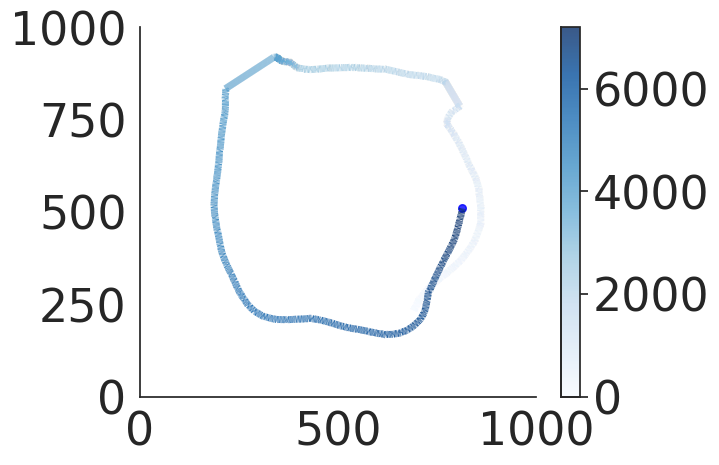

(1, 18032)


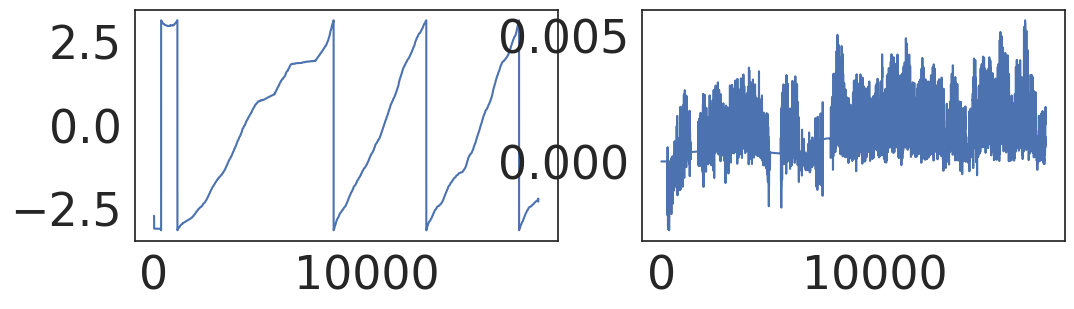

labels.vDavid_sixScreen_240411_f1.001_DZ_240411_f1_bio_horz_RL0.analysis
labels.vDavid_sixScreen_240411_f1.001_DZ_240411_f1_bio_horz_RL0.analysis :  bio_horz_RL ,  1  fish
frames x nodes x 2 x animals (18119, 6, 2, 1)


<Figure size 300x300 with 0 Axes>

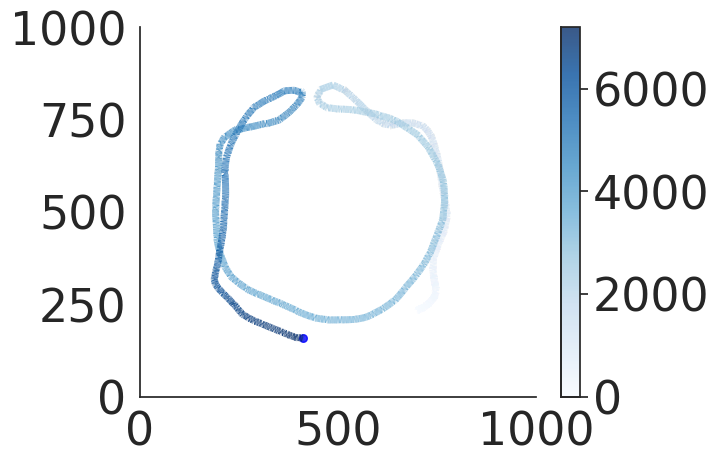

(1, 18119)


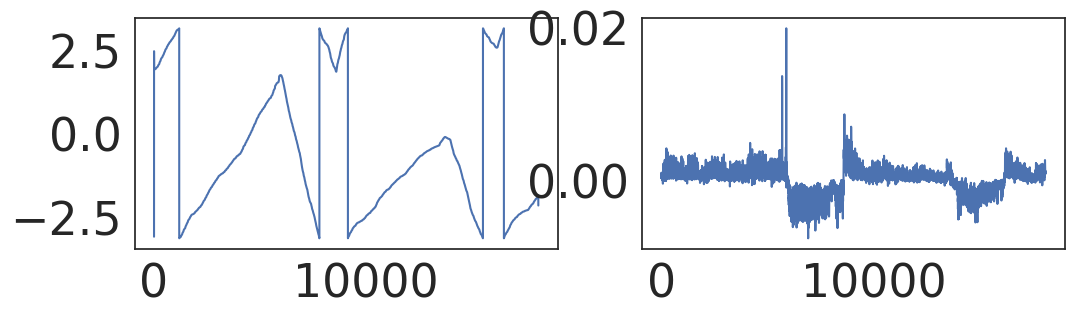

labels.vDavid_sixScreen_240411_f1.002_DZ_240411_f1_bio_vert_LR0.analysis
labels.vDavid_sixScreen_240411_f1.002_DZ_240411_f1_bio_vert_LR0.analysis :  bio_vert_LR ,  1  fish
frames x nodes x 2 x animals (18122, 6, 2, 1)


<Figure size 300x300 with 0 Axes>

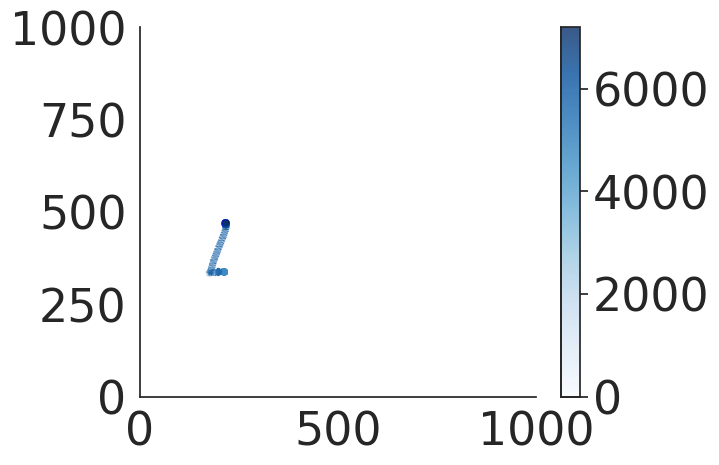

(1, 18122)


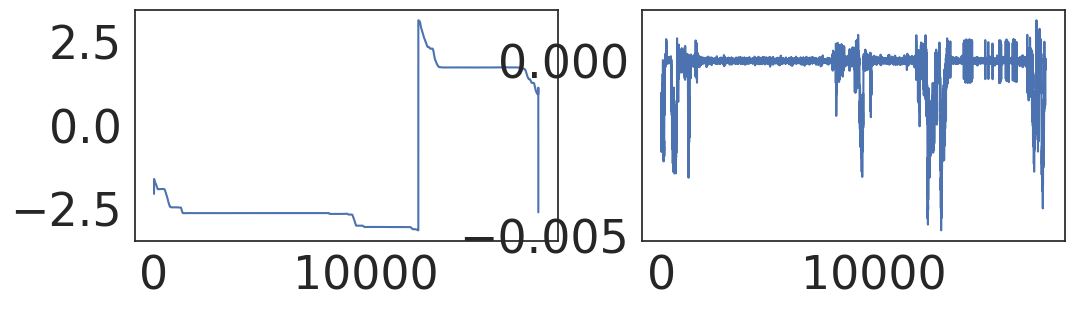

labels.vDavid_sixScreen_240411_f1.003_DZ_240411_f1_bio_vert_RL0.analysis
labels.vDavid_sixScreen_240411_f1.003_DZ_240411_f1_bio_vert_RL0.analysis :  bio_vert_RL ,  1  fish
frames x nodes x 2 x animals (18121, 6, 2, 1)


<Figure size 300x300 with 0 Axes>

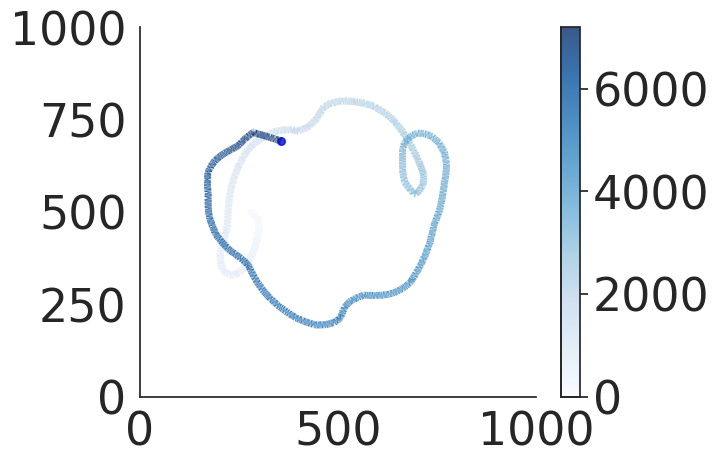

(1, 18121)


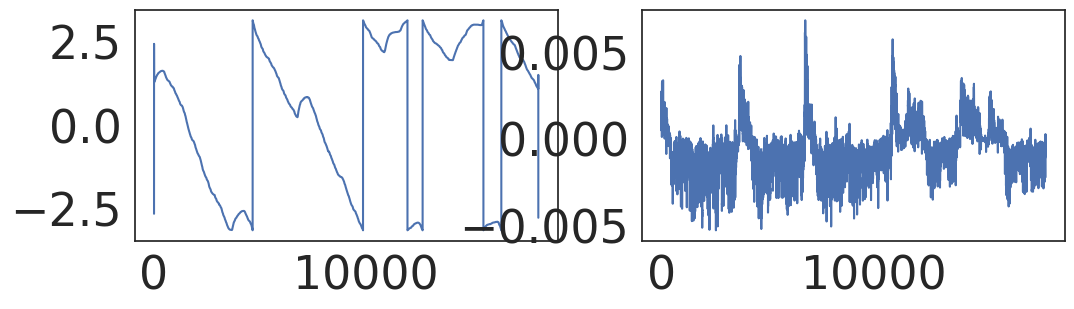

labels.vDavid_sixScreen_240411_f1.004_DZ_240411_f1_NoNbio_horz_LR0.analysis
labels.vDavid_sixScreen_240411_f1.004_DZ_240411_f1_NoNbio_horz_LR0.analysis :  NoNbio_horz_LR ,  1  fish
frames x nodes x 2 x animals (18124, 6, 2, 1)


<Figure size 300x300 with 0 Axes>

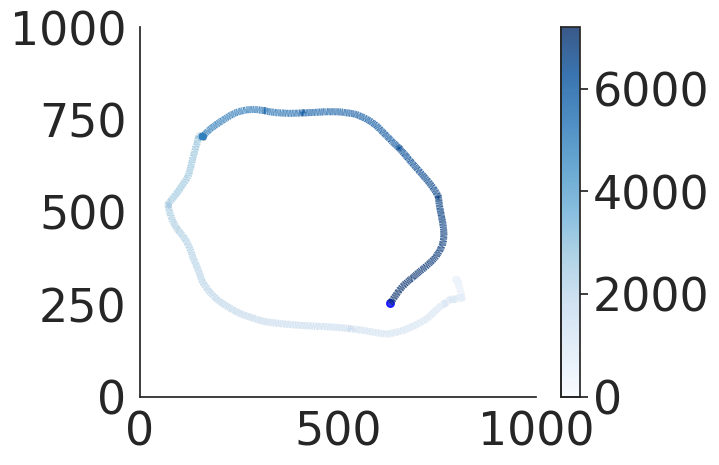

(1, 18124)


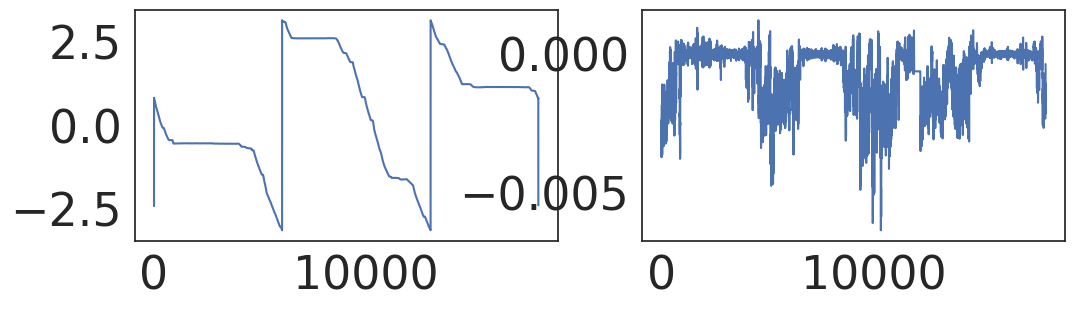

labels.vDavid_sixScreen_240411_f1.005_DZ_240411_f1_NoNbio_horz_RL0.analysis
labels.vDavid_sixScreen_240411_f1.005_DZ_240411_f1_NoNbio_horz_RL0.analysis :  NoNbio_horz_RL ,  1  fish
frames x nodes x 2 x animals (18126, 6, 2, 1)


<Figure size 300x300 with 0 Axes>

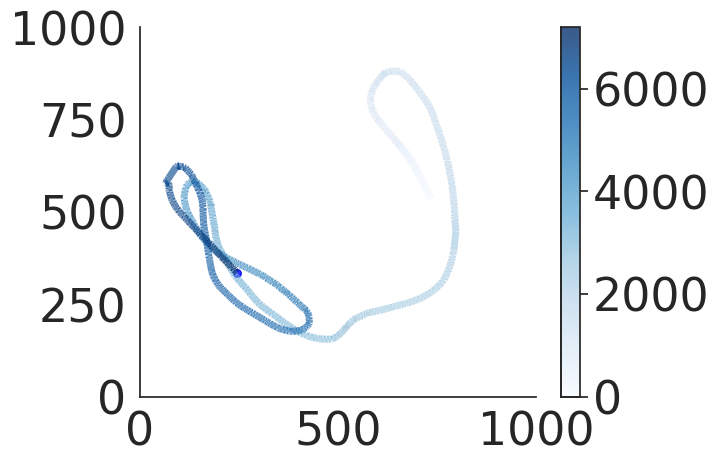

(1, 18126)


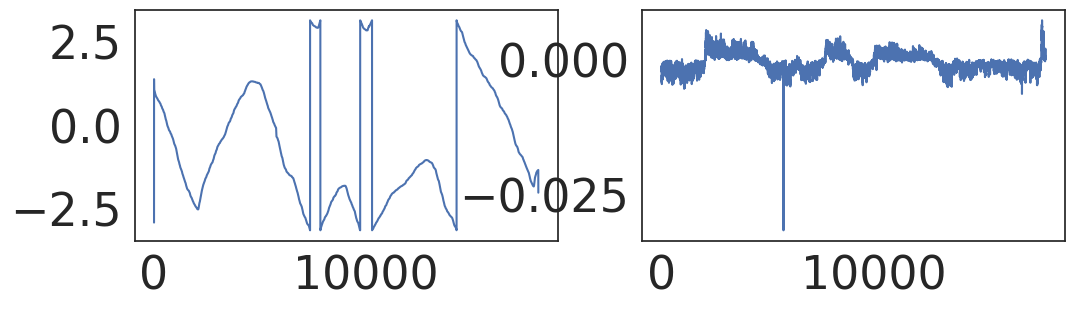

labels.SB_240416_f1.000_DZ_240416_f1_bio_horz_LR00.analysis
labels.SB_240416_f1.000_DZ_240416_f1_bio_horz_LR00.analysis :  bio_horz_LR ,  1  fish
frames x nodes x 2 x animals (14824, 5, 2, 1)


<Figure size 300x300 with 0 Axes>

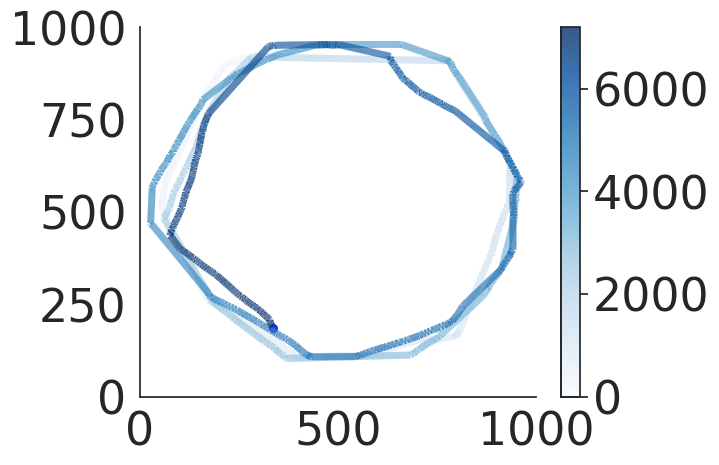

(1, 14824)


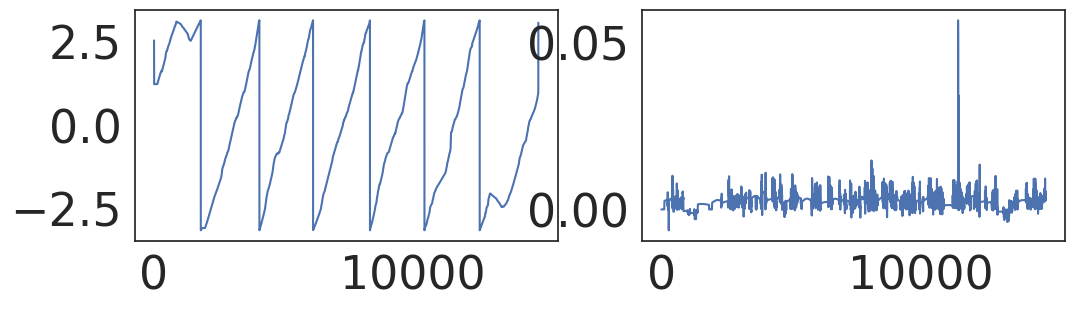

labels.SB_240416_f1.001_DZ_240416_f1_bio_horz_RL00.analysis
labels.SB_240416_f1.001_DZ_240416_f1_bio_horz_RL00.analysis :  bio_horz_RL ,  1  fish
frames x nodes x 2 x animals (14745, 5, 2, 1)


<Figure size 300x300 with 0 Axes>

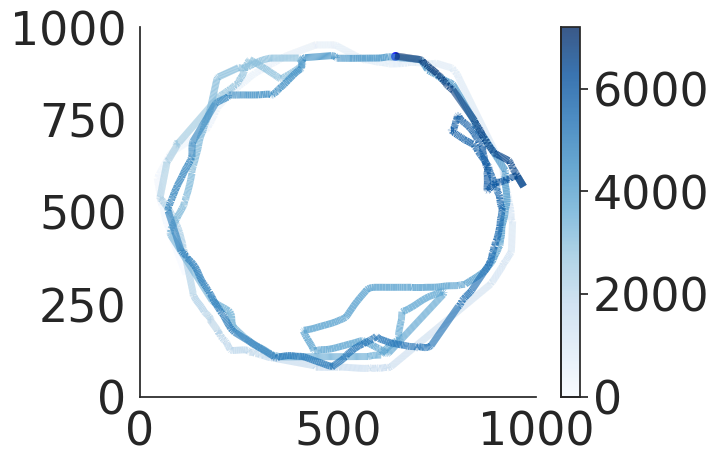

(1, 14745)


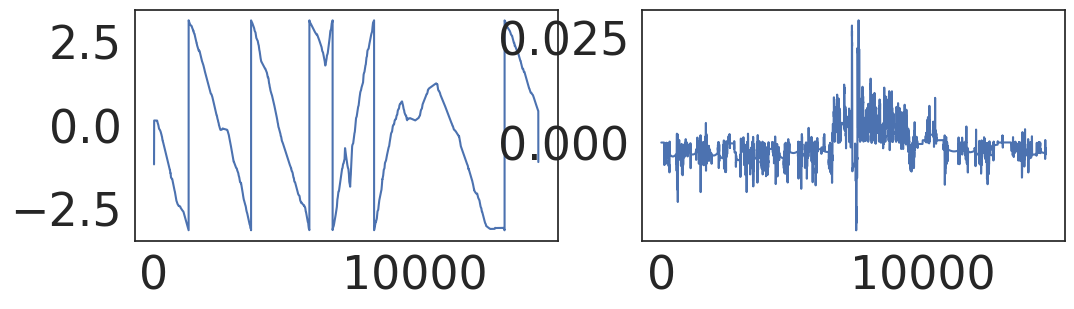

labels.SB_240416_f1.002_DZ_240416_f1_bio_vert_LR00.analysis
labels.SB_240416_f1.002_DZ_240416_f1_bio_vert_LR00.analysis :  bio_vert_LR ,  1  fish
frames x nodes x 2 x animals (14954, 5, 2, 1)


<Figure size 300x300 with 0 Axes>

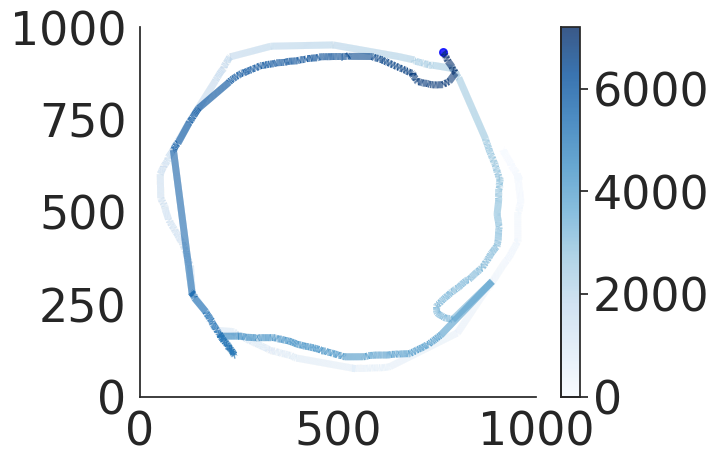

(1, 14954)


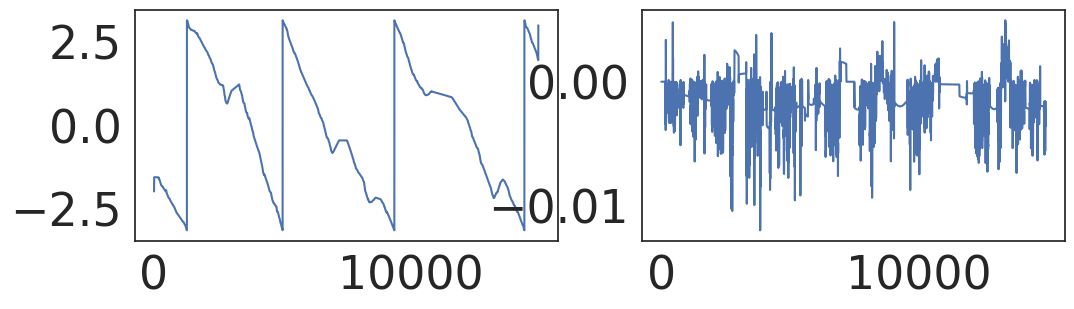

labels.SB_240416_f1.003_DZ_240416_f1_bio_vert_RL00.analysis
labels.SB_240416_f1.003_DZ_240416_f1_bio_vert_RL00.analysis :  bio_vert_RL ,  1  fish
frames x nodes x 2 x animals (9410, 5, 2, 1)


<Figure size 300x300 with 0 Axes>

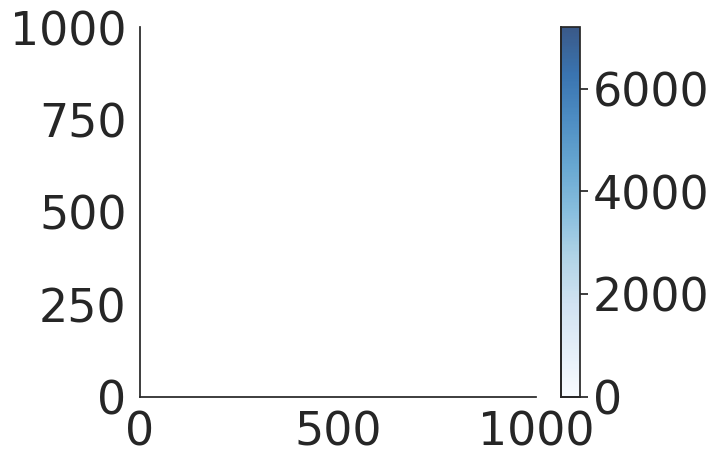

(1, 9410)


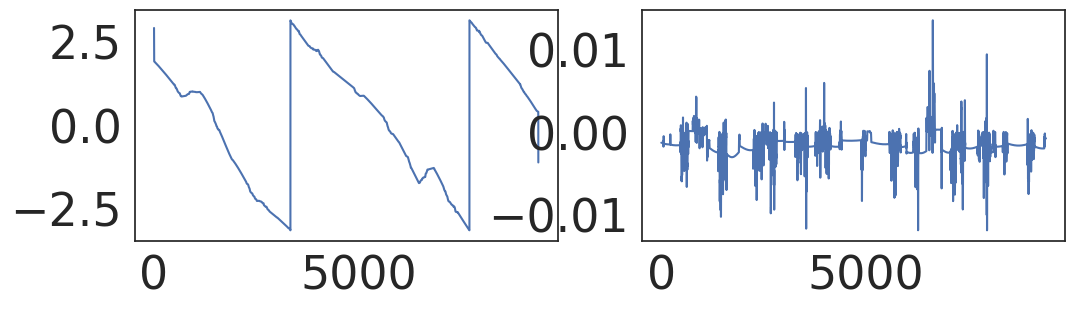

labels.SB_240416_f1.004_DZ_240416_f1_NoNbio_horz_LR00.analysis
labels.SB_240416_f1.004_DZ_240416_f1_NoNbio_horz_LR00.analysis :  NoNbio_horz_LR ,  1  fish
frames x nodes x 2 x animals (9404, 5, 2, 1)


<Figure size 300x300 with 0 Axes>

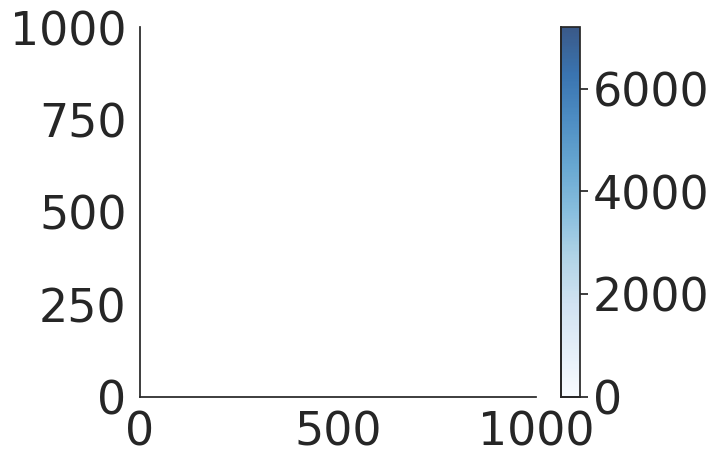

(1, 9404)


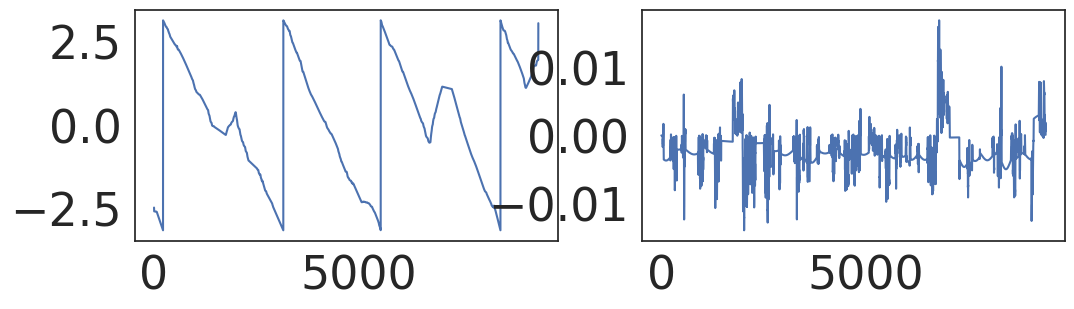

labels.SB_240416_f1.005_DZ_240416_f1_NoNbio_horz_RL00.analysis
labels.SB_240416_f1.005_DZ_240416_f1_NoNbio_horz_RL00.analysis :  NoNbio_horz_RL ,  1  fish
frames x nodes x 2 x animals (9188, 5, 2, 1)


<Figure size 300x300 with 0 Axes>

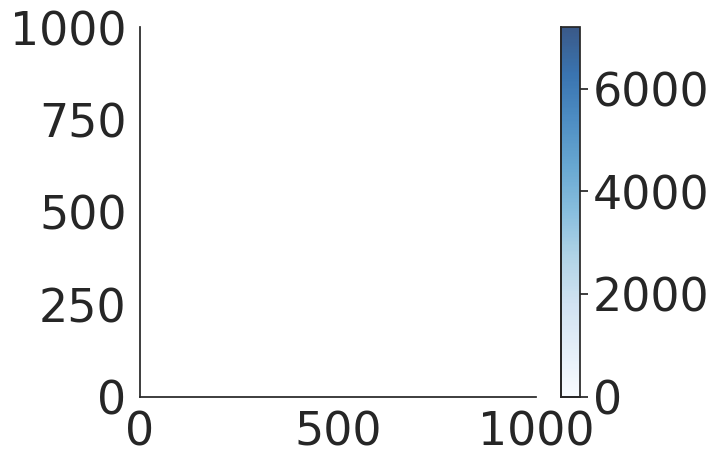

(1, 9188)


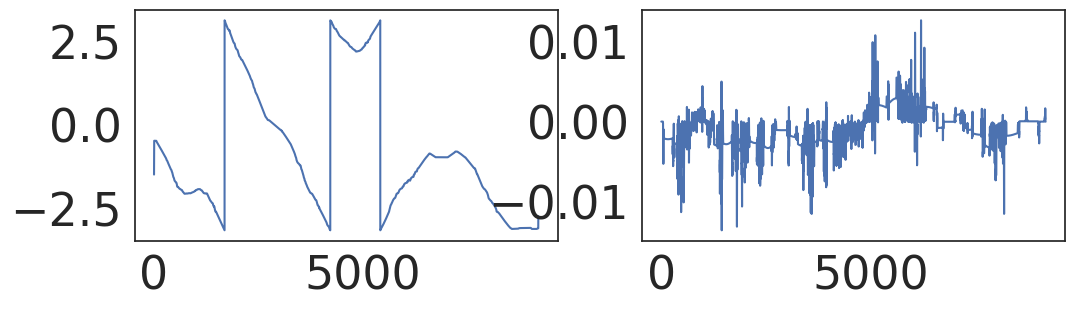

labels.SB_240416_f2.000_DZ_240416_f2_bio_horz_LR00.analysis
labels.SB_240416_f2.000_DZ_240416_f2_bio_horz_LR00.analysis :  bio_horz_LR ,  1  fish
frames x nodes x 2 x animals (9417, 5, 2, 1)


<Figure size 300x300 with 0 Axes>

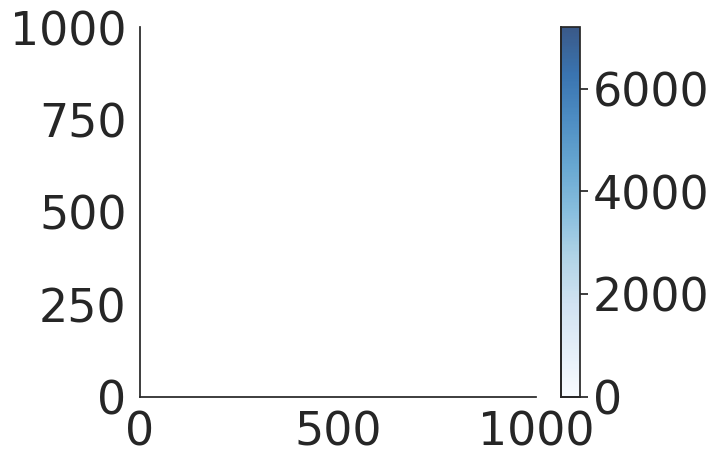

(1, 9417)


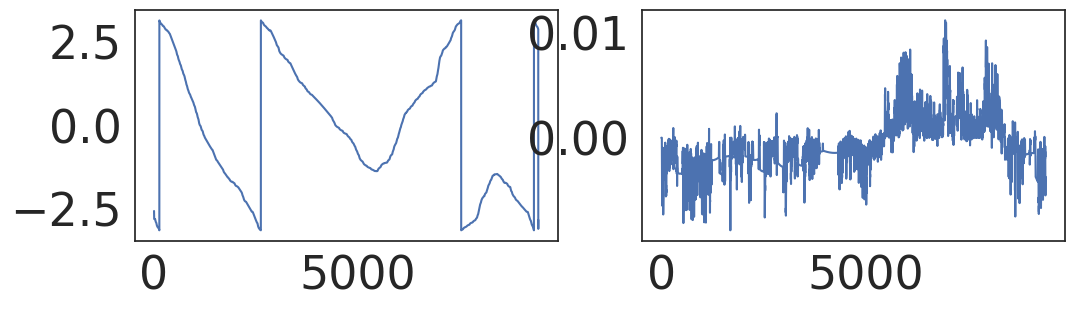

labels.SB_240416_f2.001_DZ_240416_f2_bio_horz_RL00.analysis
labels.SB_240416_f2.001_DZ_240416_f2_bio_horz_RL00.analysis :  bio_horz_RL ,  1  fish
frames x nodes x 2 x animals (9408, 5, 2, 1)


<Figure size 300x300 with 0 Axes>

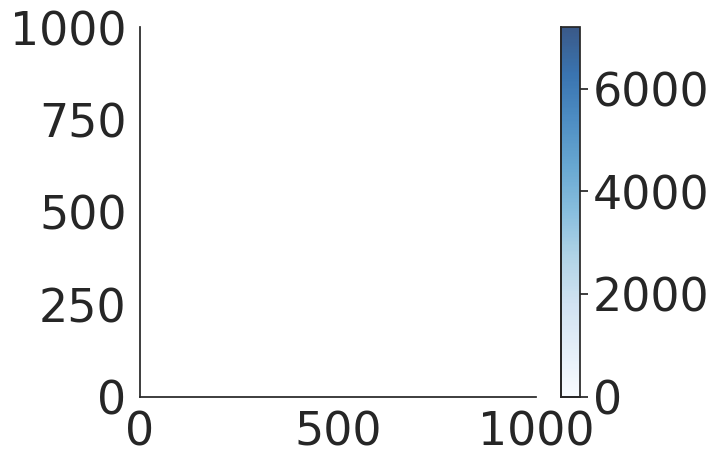

(1, 9408)


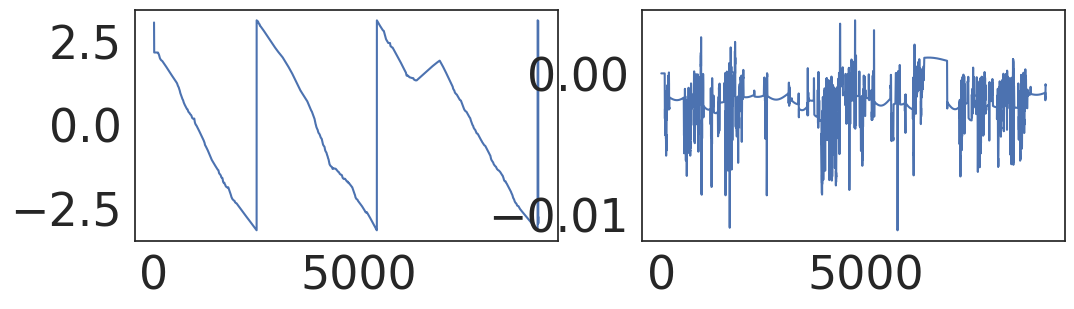

labels.SB_240416_f2.002_DZ_240416_f2_bio_vert_LR00.analysis
labels.SB_240416_f2.002_DZ_240416_f2_bio_vert_LR00.analysis :  bio_vert_LR ,  1  fish
frames x nodes x 2 x animals (14280, 5, 2, 1)


<Figure size 300x300 with 0 Axes>

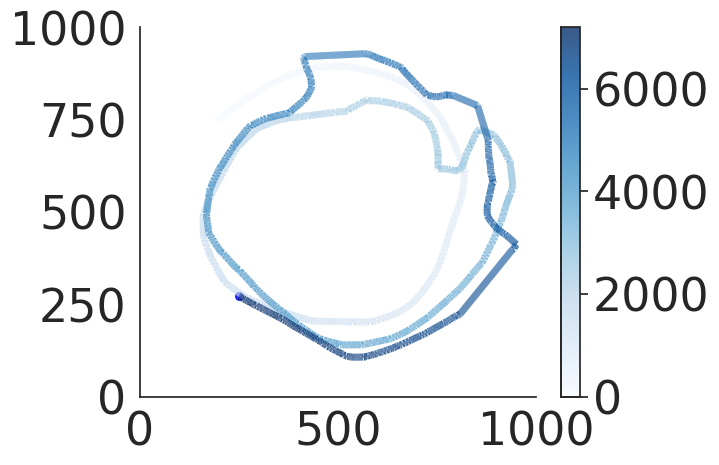

(1, 14280)


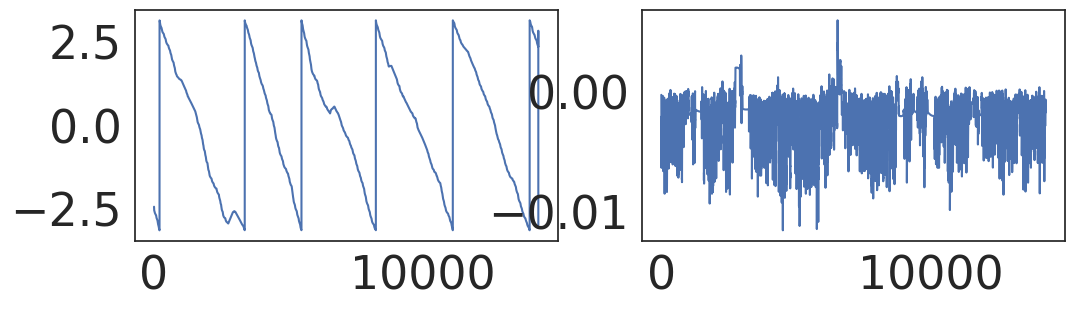

labels.SB_240416_f2.003_DZ_240416_f2_bio_vert_RL00.analysis
labels.SB_240416_f2.003_DZ_240416_f2_bio_vert_RL00.analysis :  bio_vert_RL ,  1  fish
frames x nodes x 2 x animals (14401, 5, 2, 1)


<Figure size 300x300 with 0 Axes>

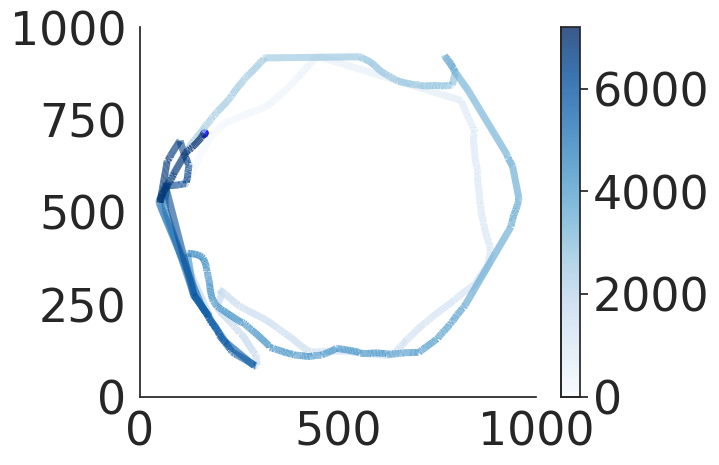

(1, 14401)


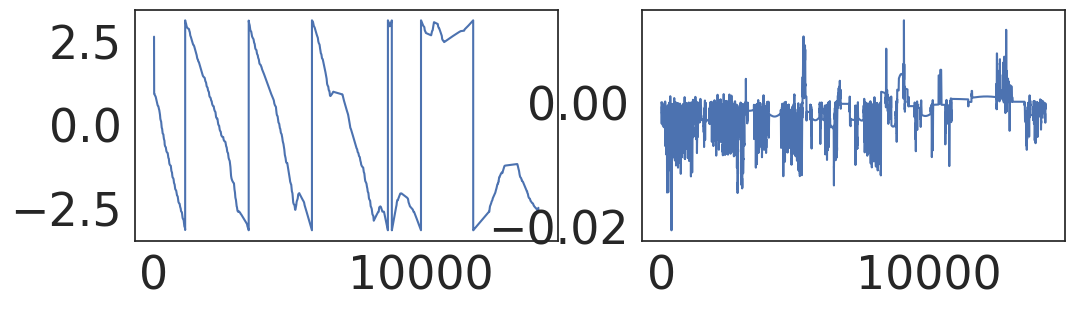

labels.SB_240416_f2.004_DZ_240416_f2_NoNbio_horz_LR00.analysis
labels.SB_240416_f2.004_DZ_240416_f2_NoNbio_horz_LR00.analysis :  NoNbio_horz_LR ,  1  fish
frames x nodes x 2 x animals (14826, 5, 2, 1)


<Figure size 300x300 with 0 Axes>

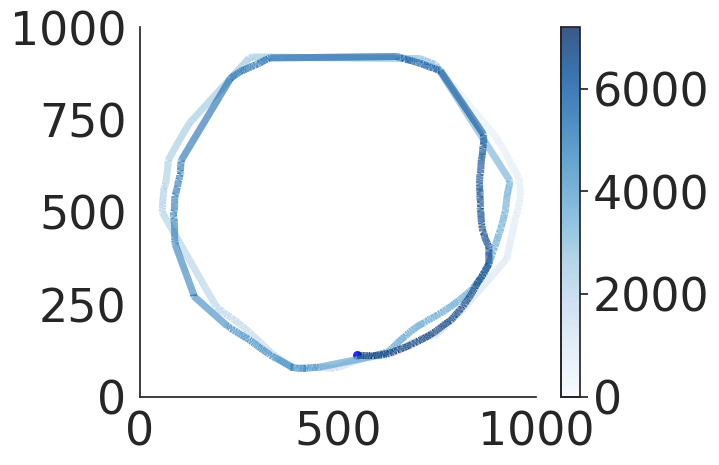

(1, 14826)


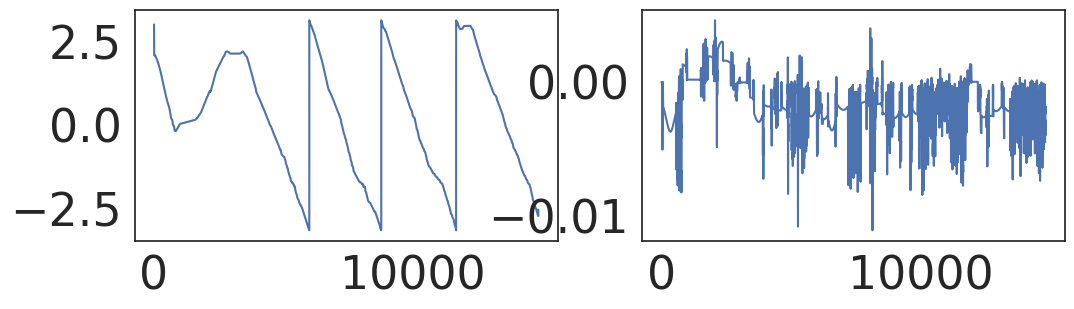

labels.SB_240416_f2.005_DZ_240416_f2_NoNbio_horz_RL00.analysis
labels.SB_240416_f2.005_DZ_240416_f2_NoNbio_horz_RL00.analysis :  NoNbio_horz_RL ,  1  fish
frames x nodes x 2 x animals (14485, 5, 2, 1)


<Figure size 300x300 with 0 Axes>

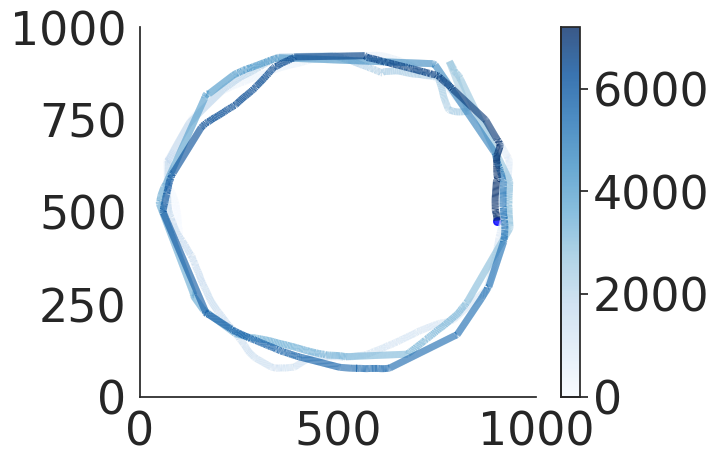

(1, 14485)


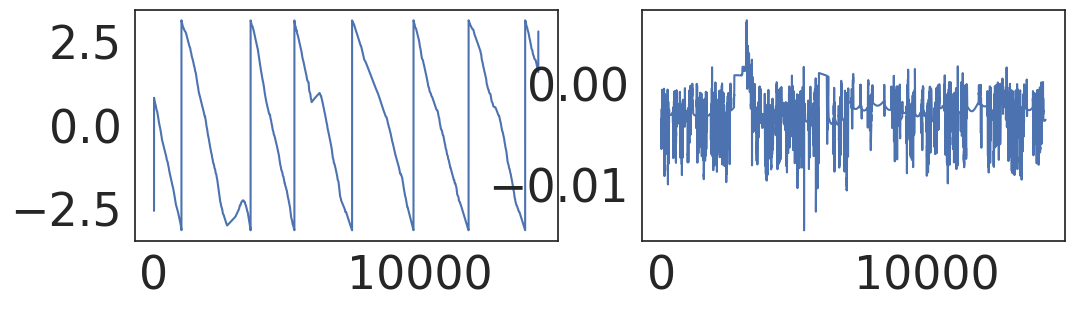

labels.vDavid_sixScreen_240416_f3.000_DZ_240416_f3_bio_horz_LR0.analysis
labels.vDavid_sixScreen_240416_f3.000_DZ_240416_f3_bio_horz_LR0.analysis :  bio_horz_LR ,  1  fish
frames x nodes x 2 x animals (17961, 6, 2, 1)


<Figure size 300x300 with 0 Axes>

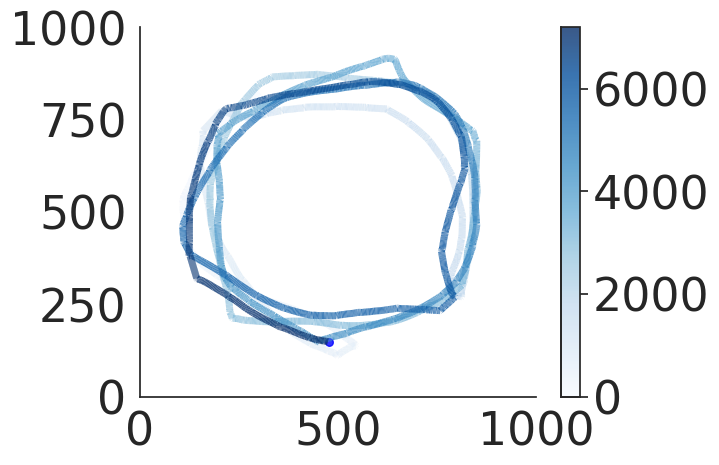

(1, 17961)


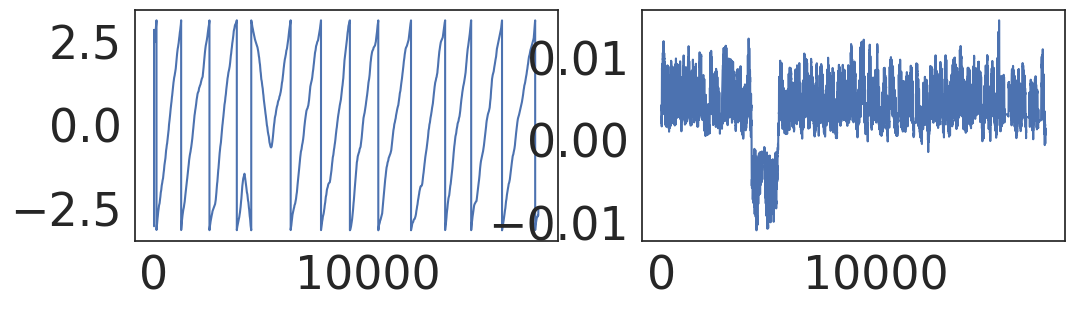

labels.vDavid_sixScreen_240416_f3.001_DZ_240416_f3_bio_horz_RL0.analysis
labels.vDavid_sixScreen_240416_f3.001_DZ_240416_f3_bio_horz_RL0.analysis :  bio_horz_RL ,  1  fish
frames x nodes x 2 x animals (18103, 6, 2, 1)


<Figure size 300x300 with 0 Axes>

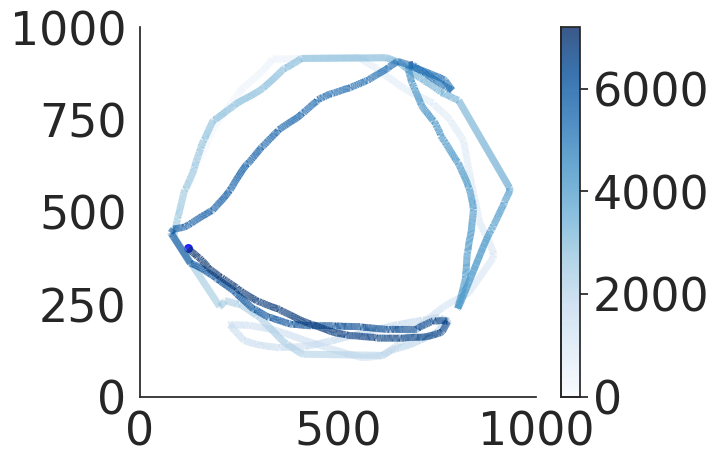

(1, 18103)


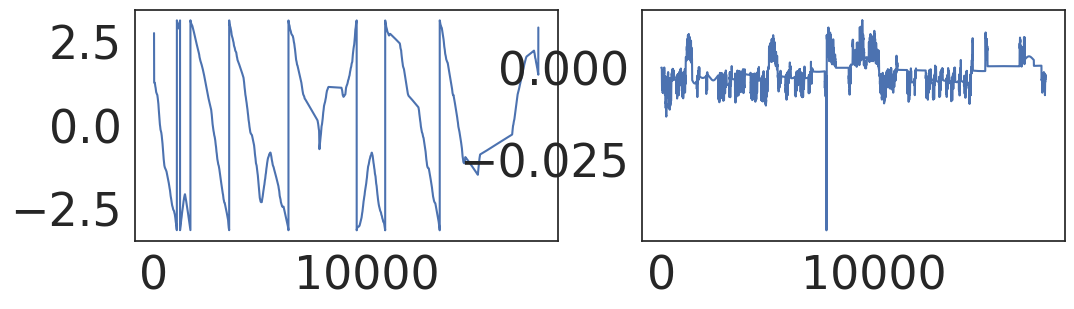

labels.vDavid_sixScreen_240416_f3.002_DZ_240416_f3_bio_vert_LR0.analysis
labels.vDavid_sixScreen_240416_f3.002_DZ_240416_f3_bio_vert_LR0.analysis :  bio_vert_LR ,  1  fish
frames x nodes x 2 x animals (18002, 6, 2, 1)


<Figure size 300x300 with 0 Axes>

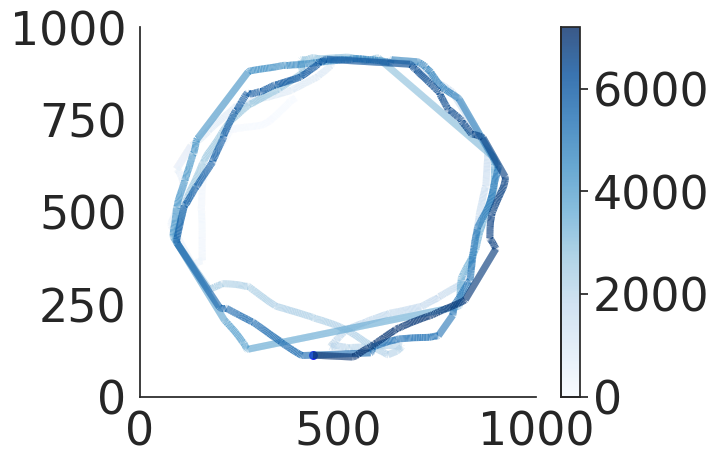

(1, 18002)


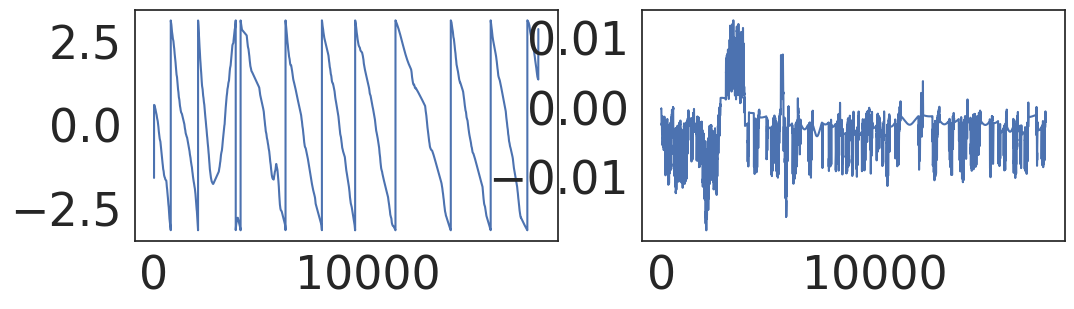

labels.vDavid_sixScreen_240416_f3.003_DZ_240416_f3_bio_vert_RL0.analysis
labels.vDavid_sixScreen_240416_f3.003_DZ_240416_f3_bio_vert_RL0.analysis :  bio_vert_RL ,  1  fish
frames x nodes x 2 x animals (15520, 6, 2, 1)


<Figure size 300x300 with 0 Axes>

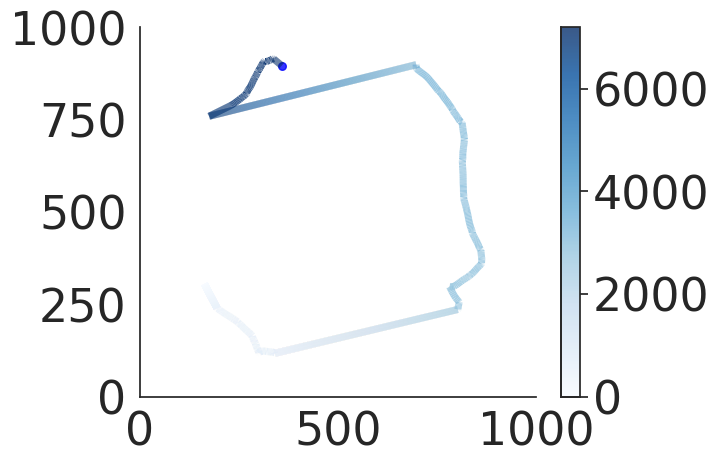

(1, 15520)


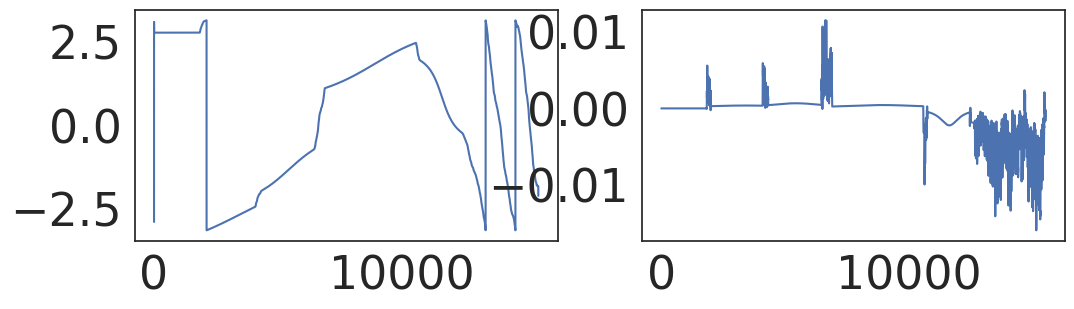

labels.vDavid_sixScreen_240416_f3.004_DZ_240416_f3_NoNbio_horz_LR0.analysis
labels.vDavid_sixScreen_240416_f3.004_DZ_240416_f3_NoNbio_horz_LR0.analysis :  NoNbio_horz_LR ,  1  fish
frames x nodes x 2 x animals (18013, 6, 2, 1)


<Figure size 300x300 with 0 Axes>

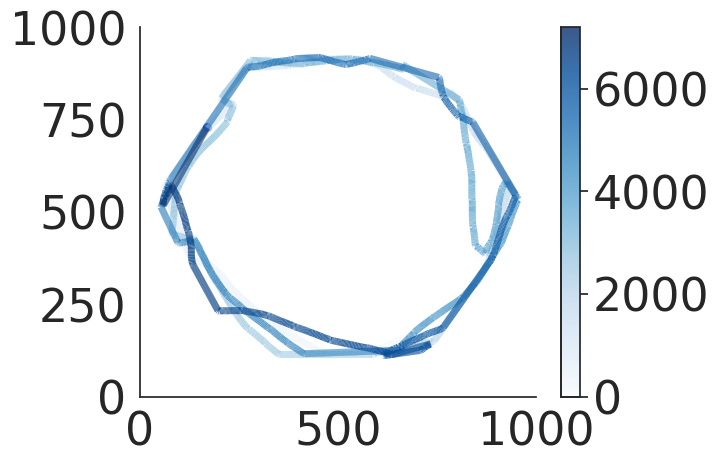

(1, 18013)


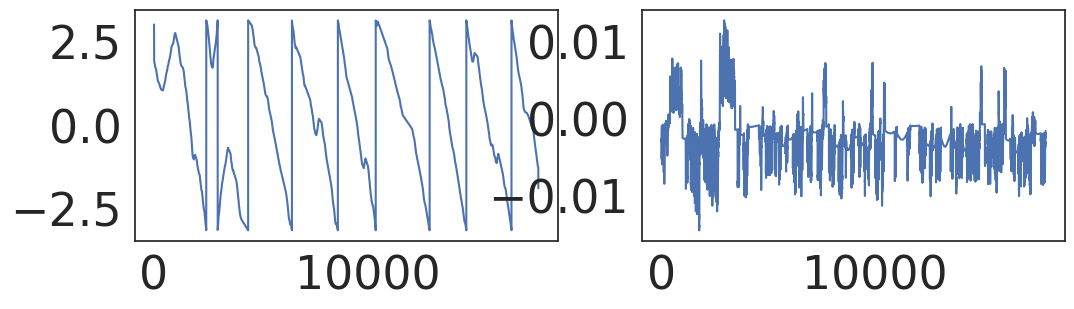

labels.vDavid_sixScreen_240416_f3.005_DZ_240416_f3_NoNbio_horz_RL0.analysis
labels.vDavid_sixScreen_240416_f3.005_DZ_240416_f3_NoNbio_horz_RL0.analysis :  NoNbio_horz_RL ,  1  fish
frames x nodes x 2 x animals (17918, 6, 2, 1)


<Figure size 300x300 with 0 Axes>

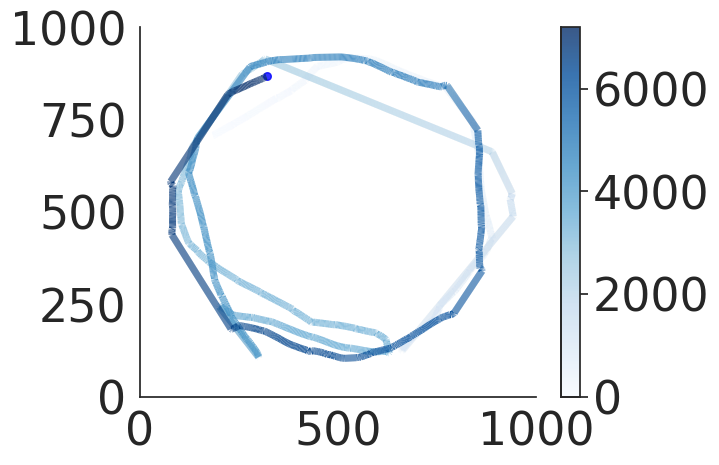

(1, 17918)


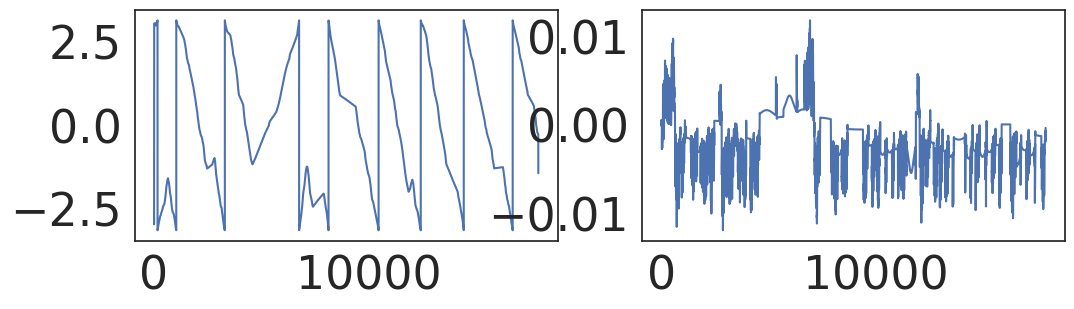

labels.vDavid_sixScreen_240416_f4.000_DZ_240416_f4_bio_horz_LR0.analysis
labels.vDavid_sixScreen_240416_f4.000_DZ_240416_f4_bio_horz_LR0.analysis :  bio_horz_LR ,  1  fish
frames x nodes x 2 x animals (18105, 6, 2, 1)


<Figure size 300x300 with 0 Axes>

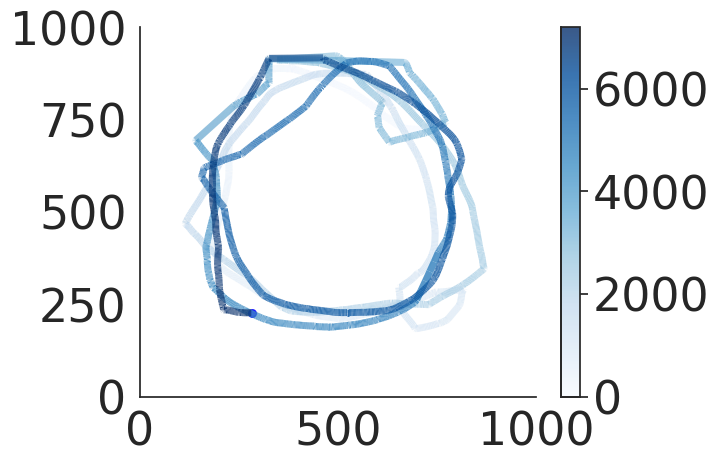

(1, 18105)


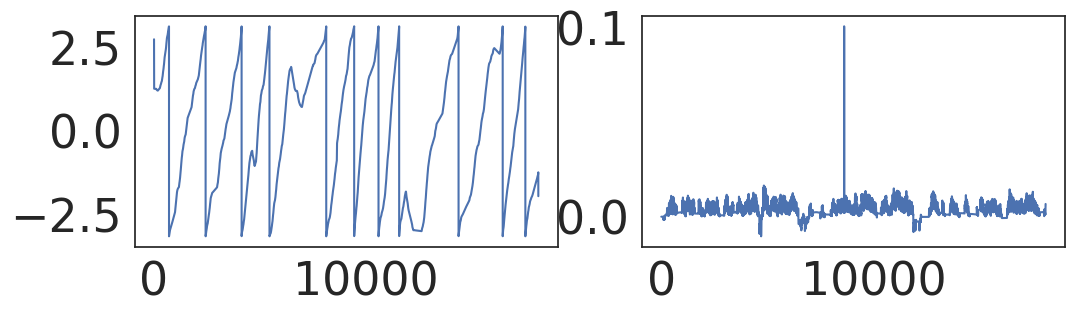

labels.vDavid_sixScreen_240416_f4.001_DZ_240416_f4_bio_horz_RL0.analysis
labels.vDavid_sixScreen_240416_f4.001_DZ_240416_f4_bio_horz_RL0.analysis :  bio_horz_RL ,  1  fish
frames x nodes x 2 x animals (18033, 6, 2, 1)


<Figure size 300x300 with 0 Axes>

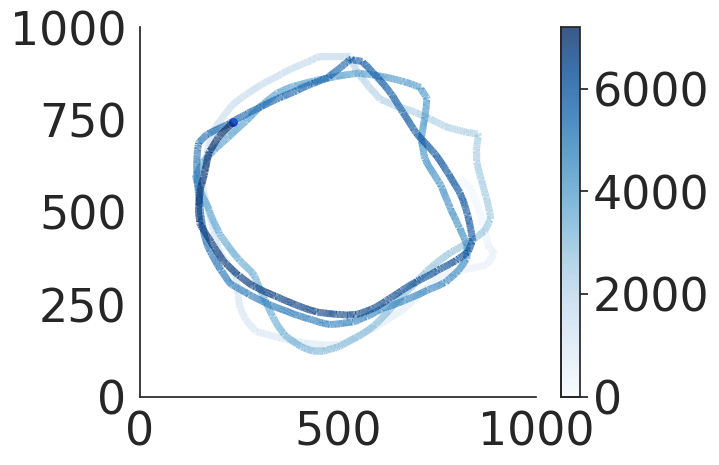

(1, 18033)


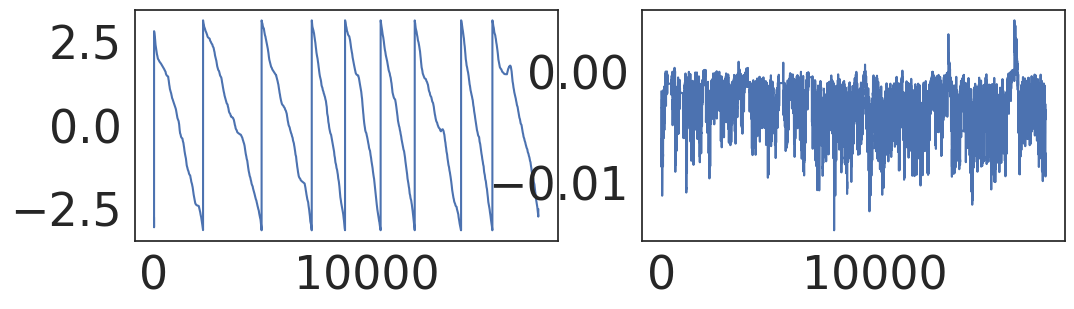

labels.vDavid_sixScreen_240416_f4.002_DZ_240416_f4_bio_vert_LR0.analysis
labels.vDavid_sixScreen_240416_f4.002_DZ_240416_f4_bio_vert_LR0.analysis :  bio_vert_LR ,  1  fish
frames x nodes x 2 x animals (18014, 6, 2, 1)


<Figure size 300x300 with 0 Axes>

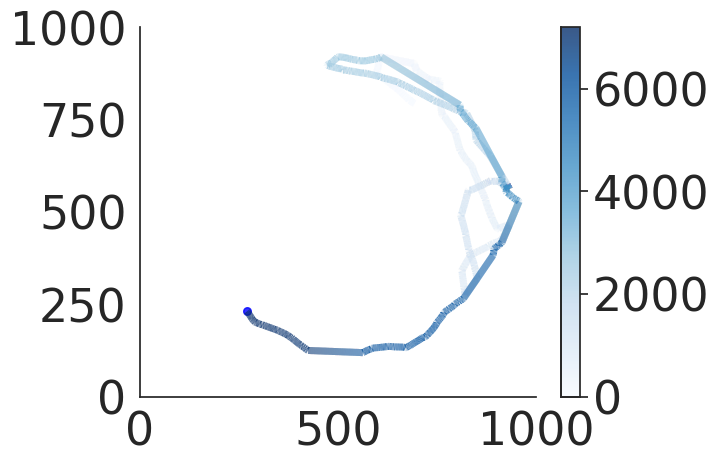

(1, 18014)


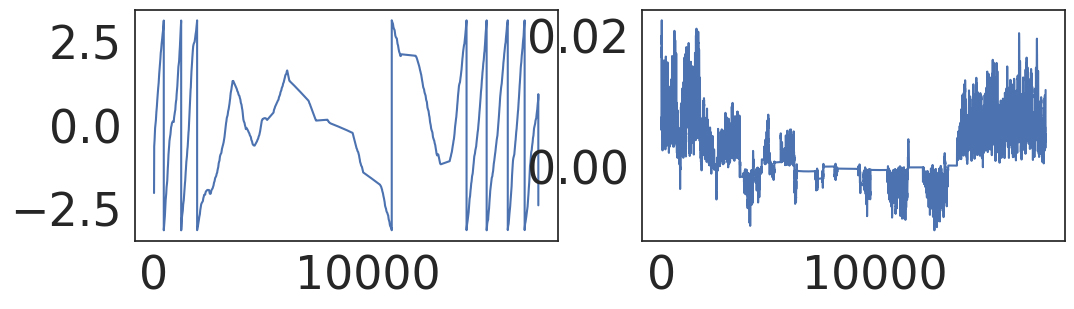

labels.vDavid_sixScreen_240416_f4.003_DZ_240416_f4_bio_vert_RL0.analysis
labels.vDavid_sixScreen_240416_f4.003_DZ_240416_f4_bio_vert_RL0.analysis :  bio_vert_RL ,  1  fish
frames x nodes x 2 x animals (18030, 6, 2, 1)


<Figure size 300x300 with 0 Axes>

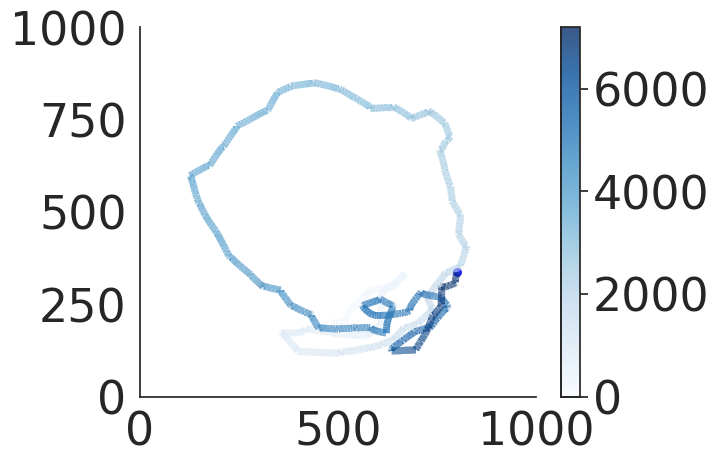

(1, 18030)


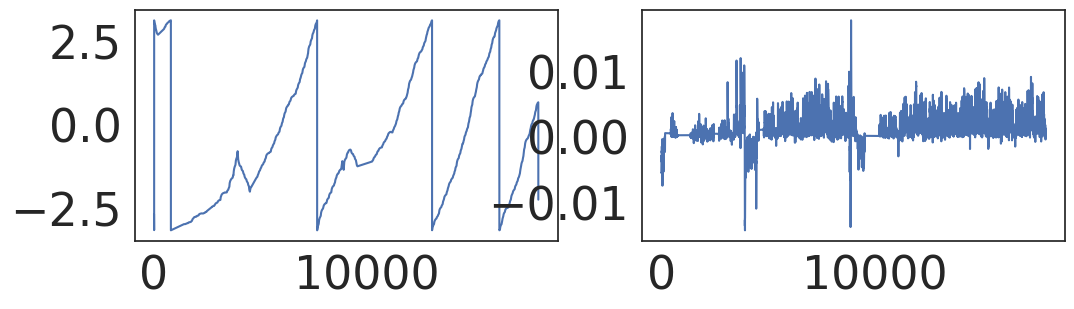

labels.vDavid_sixScreen_240416_f4.004_DZ_240416_f4_NoNbio_horz_LR0.analysis
labels.vDavid_sixScreen_240416_f4.004_DZ_240416_f4_NoNbio_horz_LR0.analysis :  NoNbio_horz_LR ,  1  fish
frames x nodes x 2 x animals (18054, 6, 2, 1)


<Figure size 300x300 with 0 Axes>

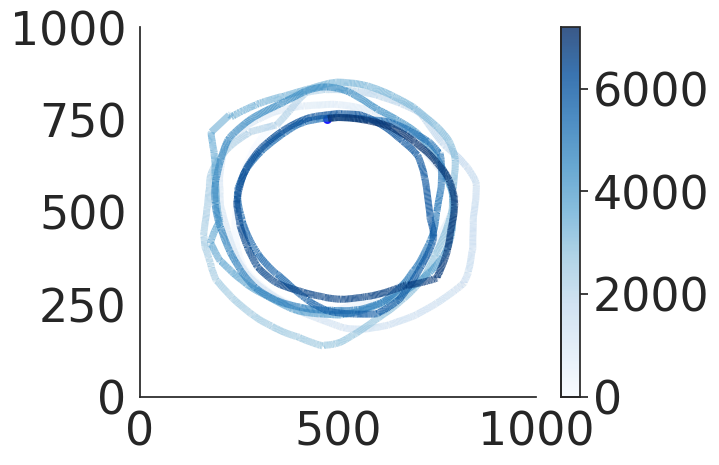

(1, 18054)


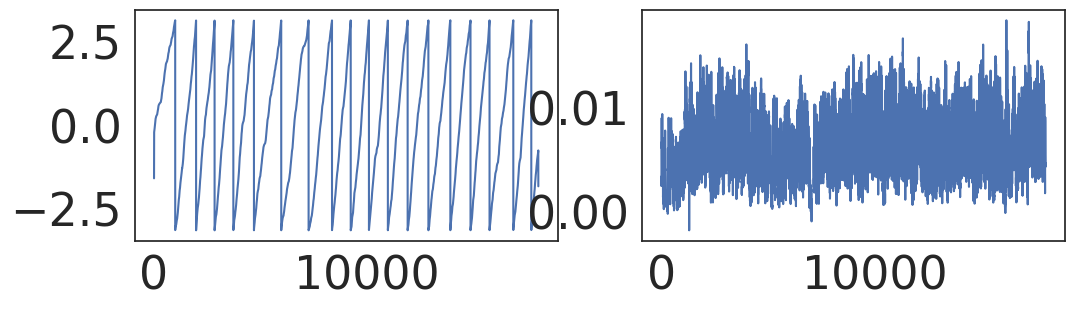

labels.vDavid_sixScreen_240416_f4.005_DZ_240416_f4_NoNbio_horz_RL0.analysis
labels.vDavid_sixScreen_240416_f4.005_DZ_240416_f4_NoNbio_horz_RL0.analysis :  NoNbio_horz_RL ,  1  fish
frames x nodes x 2 x animals (18004, 6, 2, 1)


<Figure size 300x300 with 0 Axes>

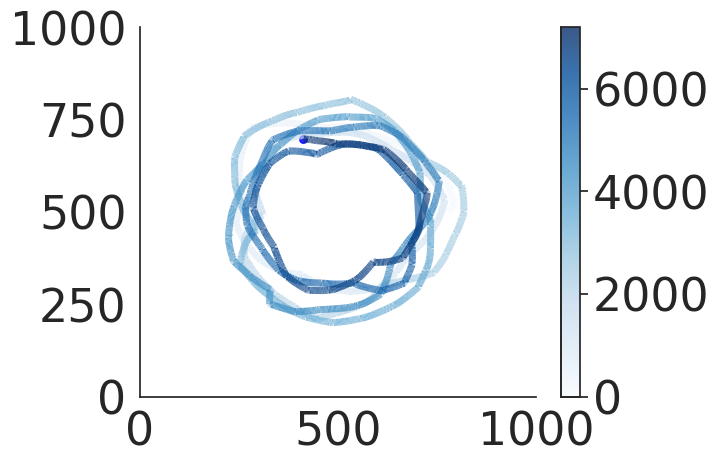

(1, 18004)


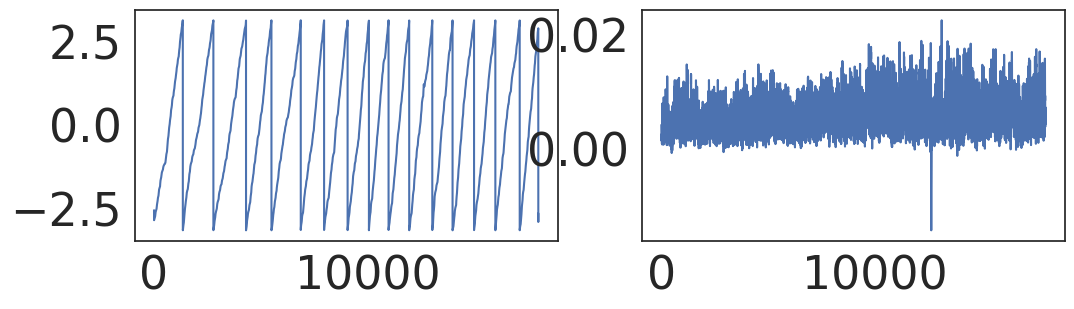

labels.vDavid_sixScreen_240417_f1.000_DZ_240417_f1_bio_horz_LR0.analysis
labels.vDavid_sixScreen_240417_f1.000_DZ_240417_f1_bio_horz_LR0.analysis :  bio_horz_LR ,  1  fish
frames x nodes x 2 x animals (18041, 6, 2, 1)


<Figure size 300x300 with 0 Axes>

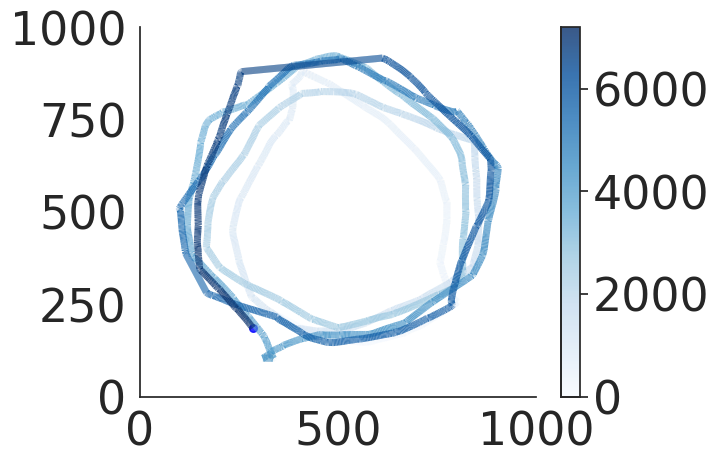

(1, 18041)


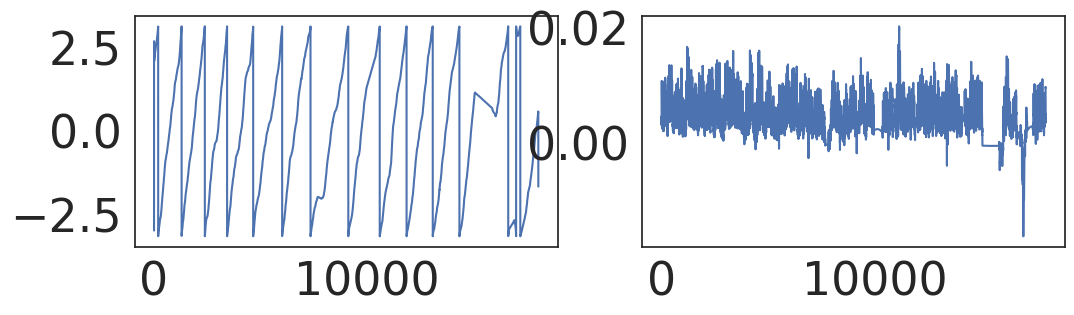

labels.vDavid_sixScreen_240417_f1.001_DZ_240417_f1_bio_horz_RL0.analysis
labels.vDavid_sixScreen_240417_f1.001_DZ_240417_f1_bio_horz_RL0.analysis :  bio_horz_RL ,  1  fish
frames x nodes x 2 x animals (17938, 6, 2, 1)


<Figure size 300x300 with 0 Axes>

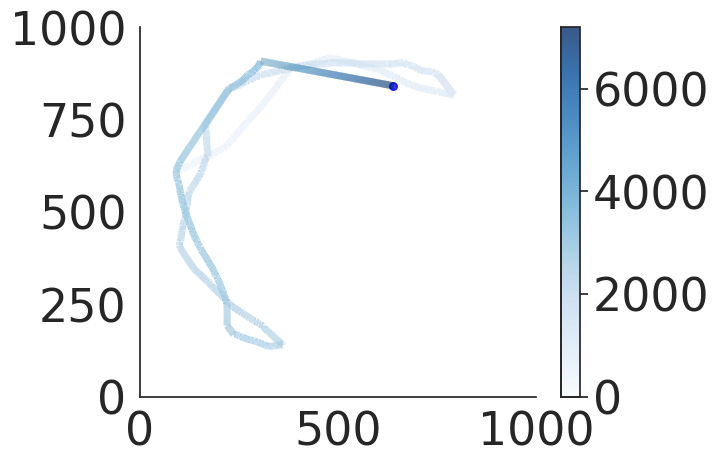

(1, 17938)


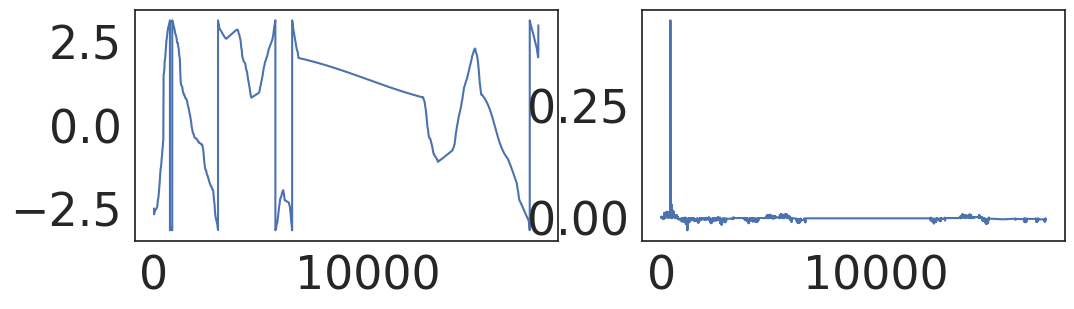

labels.vDavid_sixScreen_240417_f1.002_DZ_240417_f1_bio_vert_LR0.analysis
labels.vDavid_sixScreen_240417_f1.002_DZ_240417_f1_bio_vert_LR0.analysis :  bio_vert_LR ,  1  fish
frames x nodes x 2 x animals (18007, 6, 2, 1)


<Figure size 300x300 with 0 Axes>

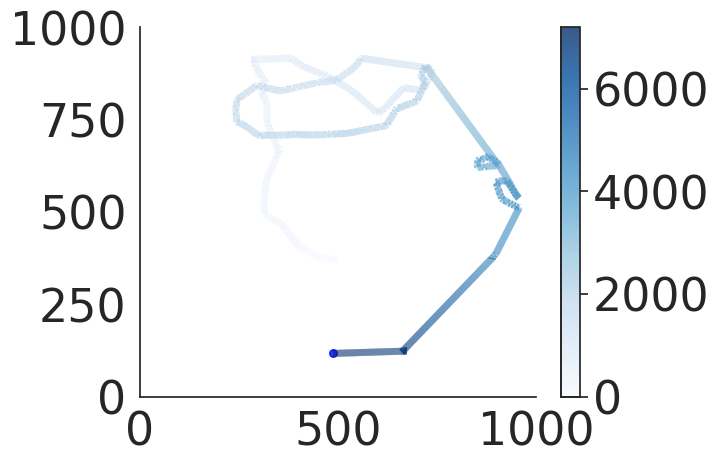

(1, 18007)


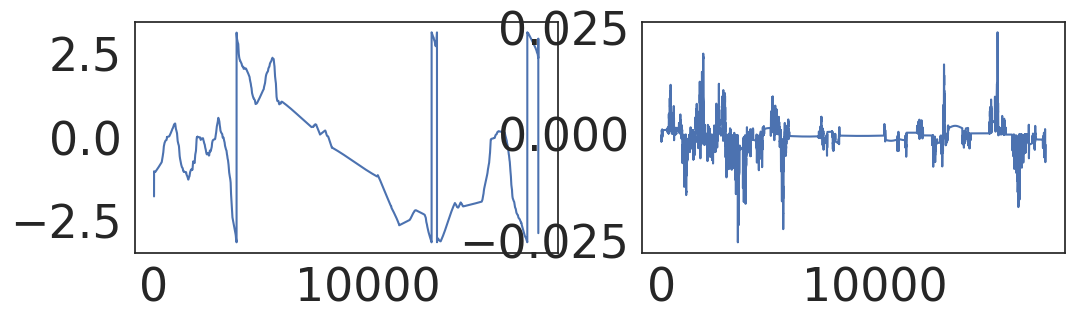

labels.vDavid_sixScreen_240417_f1.003_DZ_240417_f1_bio_vert_RL0.analysis
labels.vDavid_sixScreen_240417_f1.003_DZ_240417_f1_bio_vert_RL0.analysis :  bio_vert_RL ,  1  fish
frames x nodes x 2 x animals (18053, 6, 2, 1)


<Figure size 300x300 with 0 Axes>

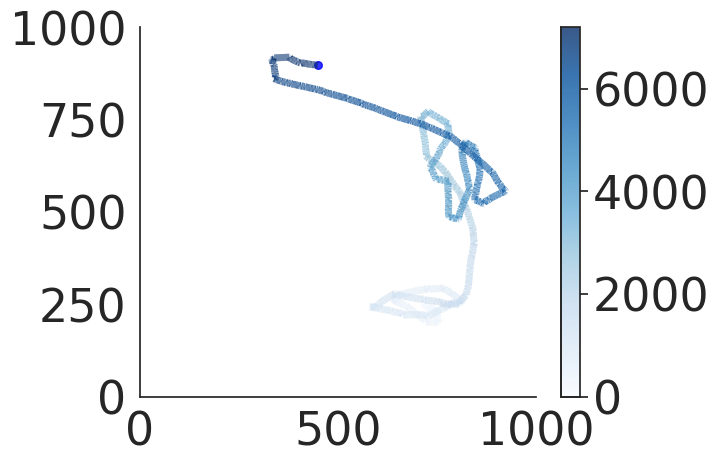

(1, 18053)


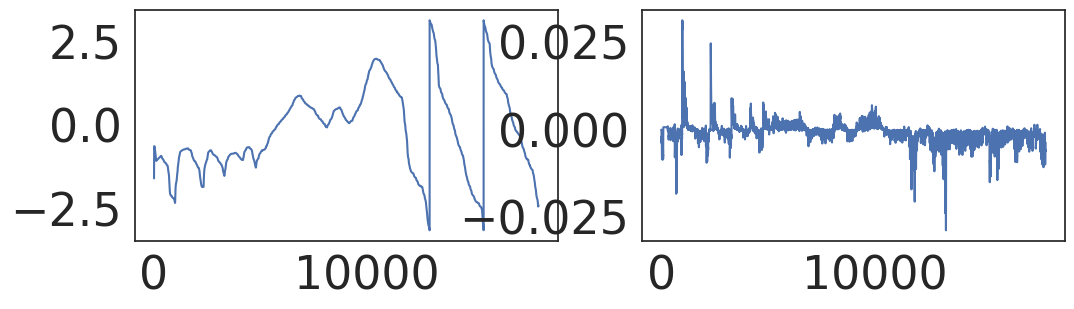

labels.vDavid_sixScreen_240417_f1.004_DZ_240417_f1_NoNbio_horz_LR0.analysis
labels.vDavid_sixScreen_240417_f1.004_DZ_240417_f1_NoNbio_horz_LR0.analysis :  NoNbio_horz_LR ,  1  fish
frames x nodes x 2 x animals (18008, 6, 2, 1)


<Figure size 300x300 with 0 Axes>

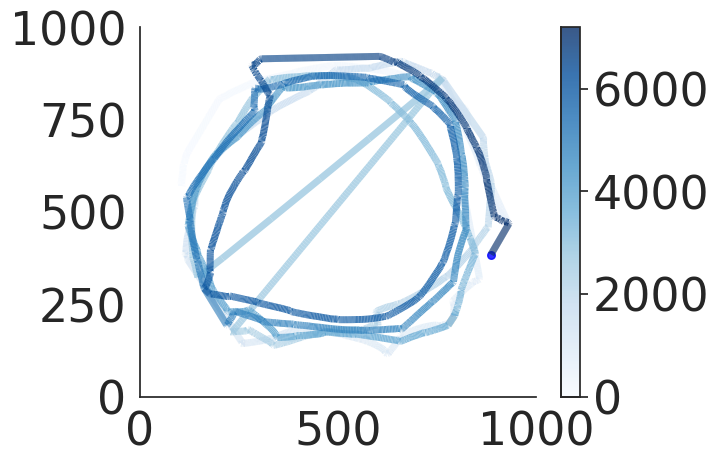

(1, 18008)


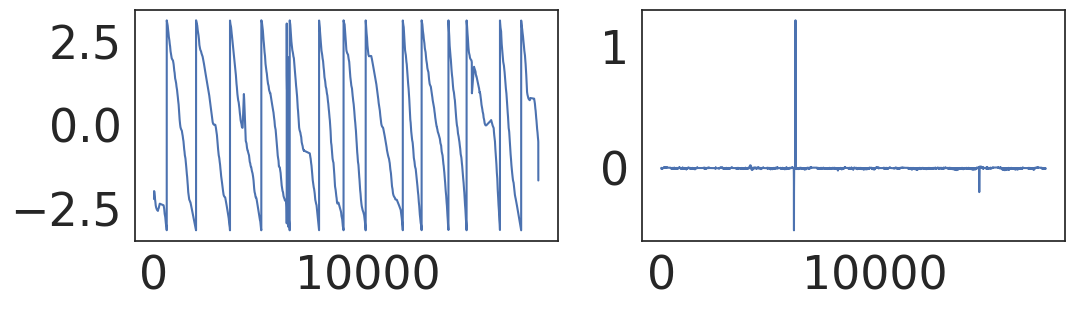

labels.vDavid_sixScreen_240417_f1.005_DZ_240417_f1_NoNbio_horz_RL0.analysis
labels.vDavid_sixScreen_240417_f1.005_DZ_240417_f1_NoNbio_horz_RL0.analysis :  NoNbio_horz_RL ,  1  fish
frames x nodes x 2 x animals (18016, 6, 2, 1)


<Figure size 300x300 with 0 Axes>

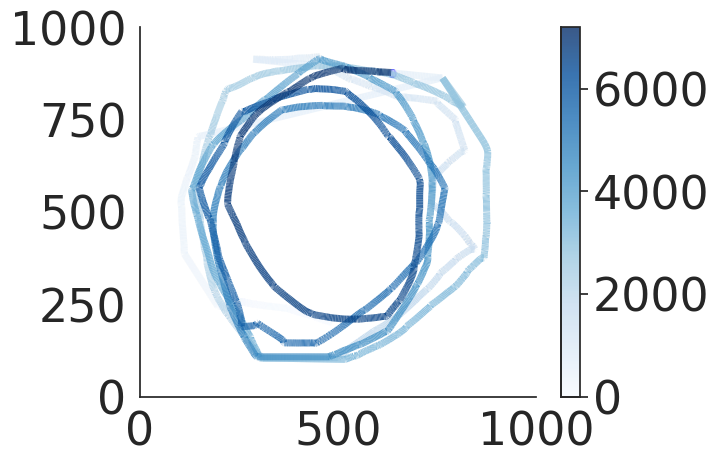

(1, 18016)


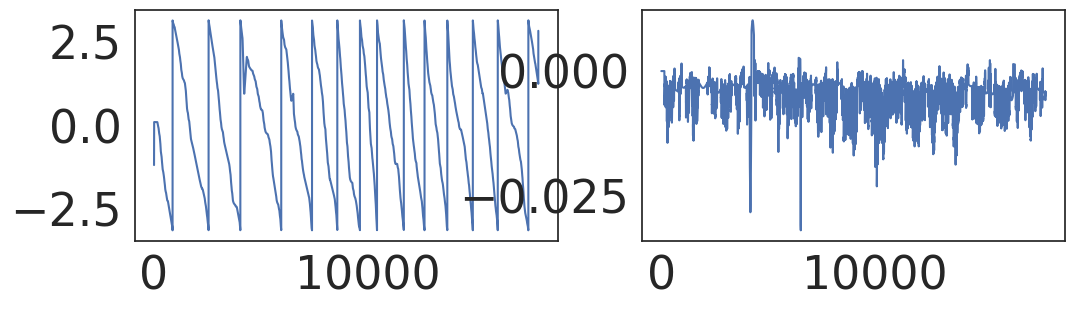

labels.vDavid_sixScreen_240417_f2.000_DZ_240417_f2_bio_horz_LR0.analysis
labels.vDavid_sixScreen_240417_f2.000_DZ_240417_f2_bio_horz_LR0.analysis :  bio_horz_LR ,  1  fish
frames x nodes x 2 x animals (18021, 6, 2, 1)


<Figure size 300x300 with 0 Axes>

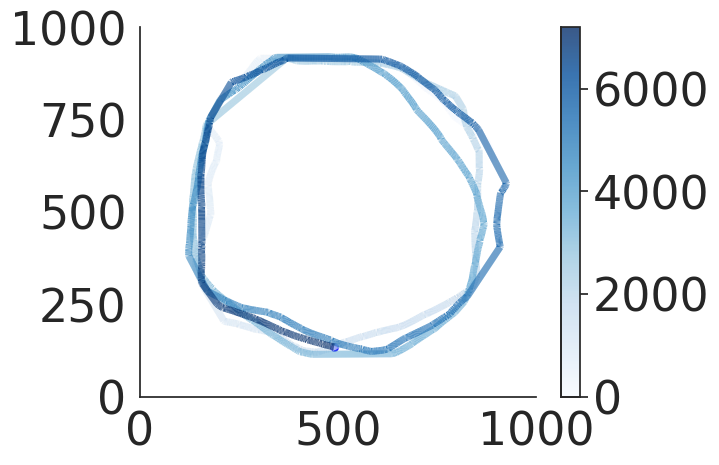

(1, 18021)


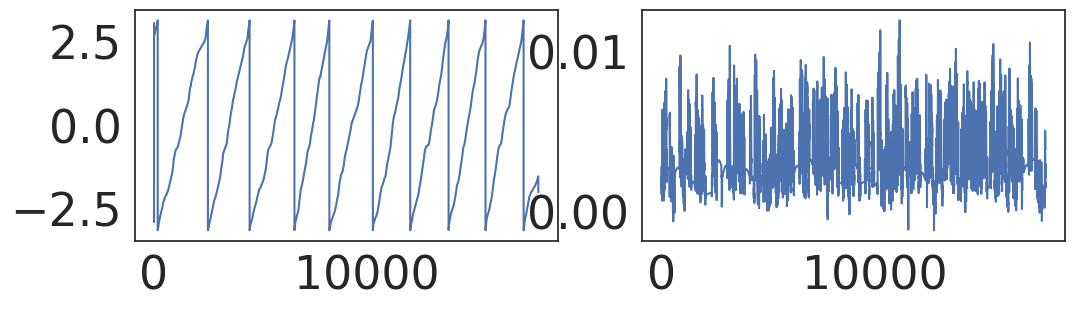

labels.vDavid_sixScreen_240417_f2.001_DZ_240417_f2_bio_horz_RL0.analysis
labels.vDavid_sixScreen_240417_f2.001_DZ_240417_f2_bio_horz_RL0.analysis :  bio_horz_RL ,  1  fish
frames x nodes x 2 x animals (18021, 6, 2, 1)


<Figure size 300x300 with 0 Axes>

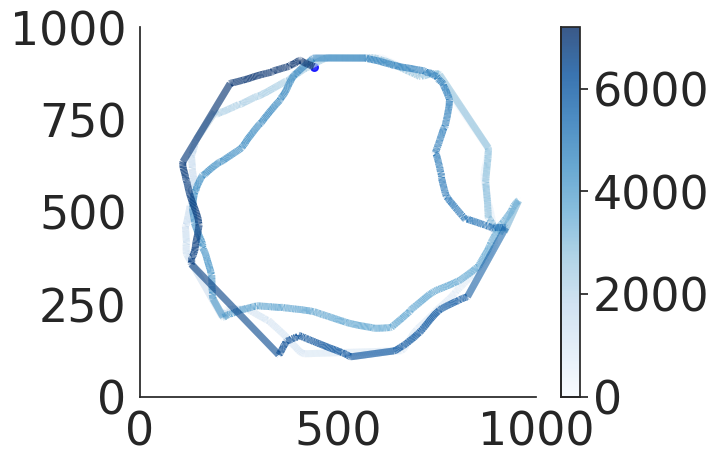

(1, 18021)


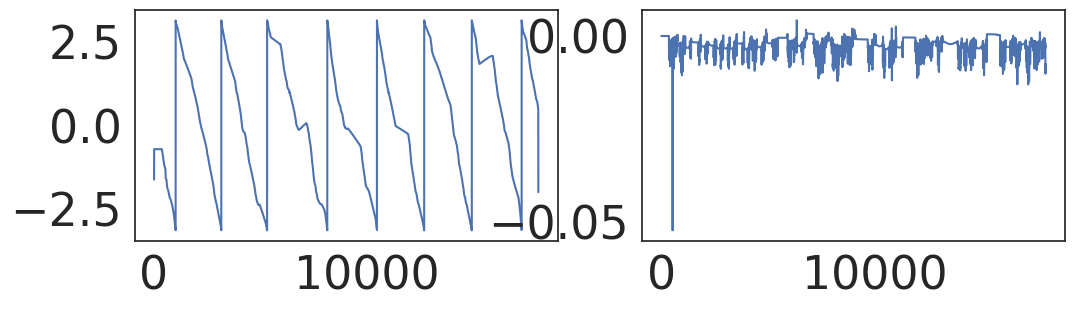

labels.vDavid_sixScreen_240417_f2.002_DZ_240417_f2_bio_vert_LR0.analysis
labels.vDavid_sixScreen_240417_f2.002_DZ_240417_f2_bio_vert_LR0.analysis :  bio_vert_LR ,  1  fish
frames x nodes x 2 x animals (17605, 6, 2, 1)


<Figure size 300x300 with 0 Axes>

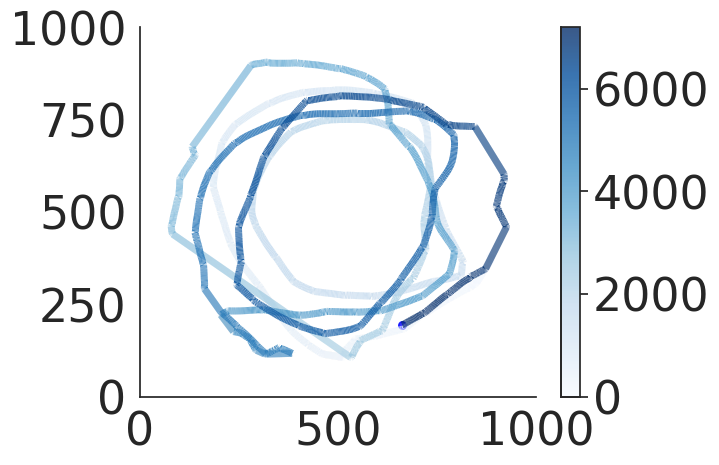

(1, 17605)


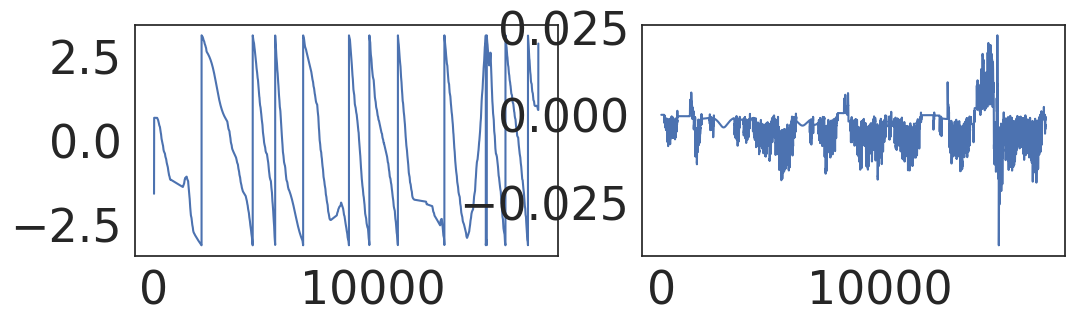

labels.vDavid_sixScreen_240417_f2.003_DZ_240417_f2_bio_vert_RL0.analysis
labels.vDavid_sixScreen_240417_f2.003_DZ_240417_f2_bio_vert_RL0.analysis :  bio_vert_RL ,  1  fish
frames x nodes x 2 x animals (15570, 6, 2, 1)


<Figure size 300x300 with 0 Axes>

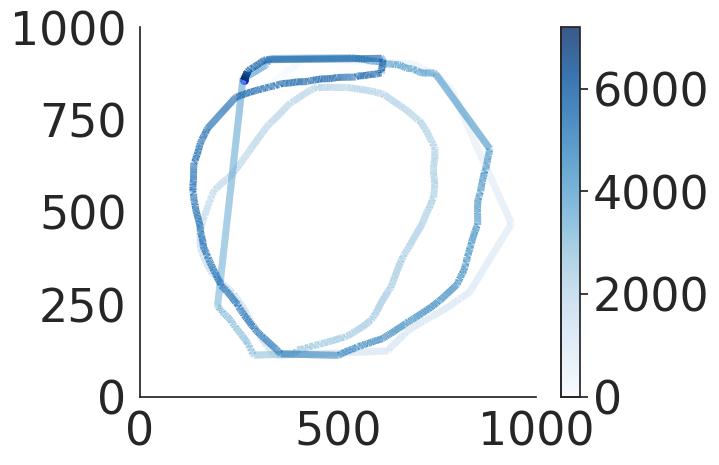

(1, 15570)


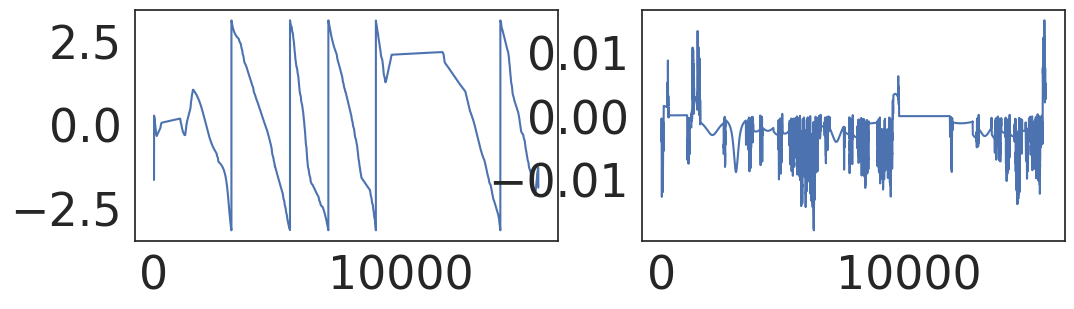

labels.vDavid_sixScreen_240417_f2.004_DZ_240417_f2_NoNbio_horz_LR0.analysis
labels.vDavid_sixScreen_240417_f2.004_DZ_240417_f2_NoNbio_horz_LR0.analysis :  NoNbio_horz_LR ,  1  fish
frames x nodes x 2 x animals (17804, 6, 2, 1)


<Figure size 300x300 with 0 Axes>

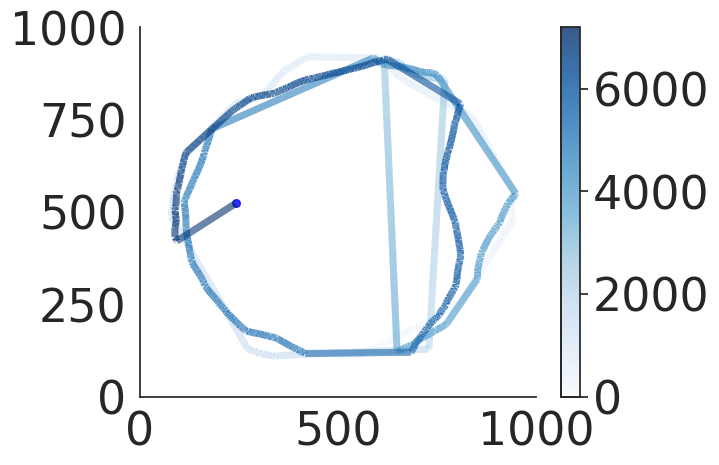

(1, 17804)


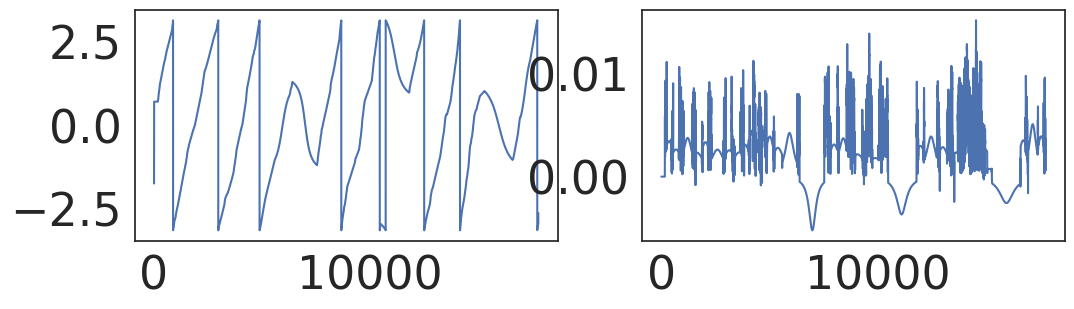

labels.vDavid_sixScreen_240417_f2.005_DZ_240417_f2_NoNbio_horz_RL0.analysis
labels.vDavid_sixScreen_240417_f2.005_DZ_240417_f2_NoNbio_horz_RL0.analysis :  NoNbio_horz_RL ,  1  fish
frames x nodes x 2 x animals (15887, 6, 2, 1)


<Figure size 300x300 with 0 Axes>

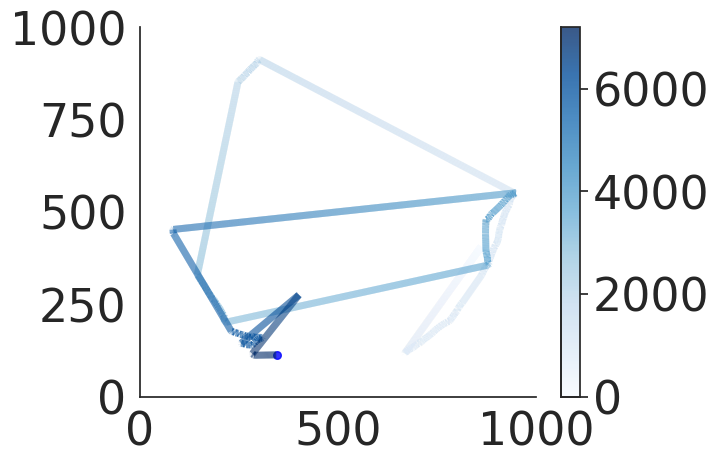

(1, 15887)


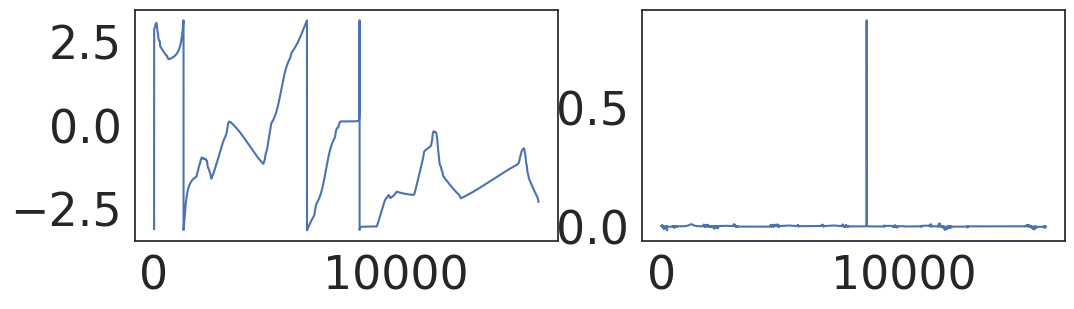

labels.SB_240417_f3.000_DZ_240417_f3_bio_horz_LR00.analysis
labels.SB_240417_f3.000_DZ_240417_f3_bio_horz_LR00.analysis :  bio_horz_LR ,  1  fish
frames x nodes x 2 x animals (14781, 5, 2, 1)


<Figure size 300x300 with 0 Axes>

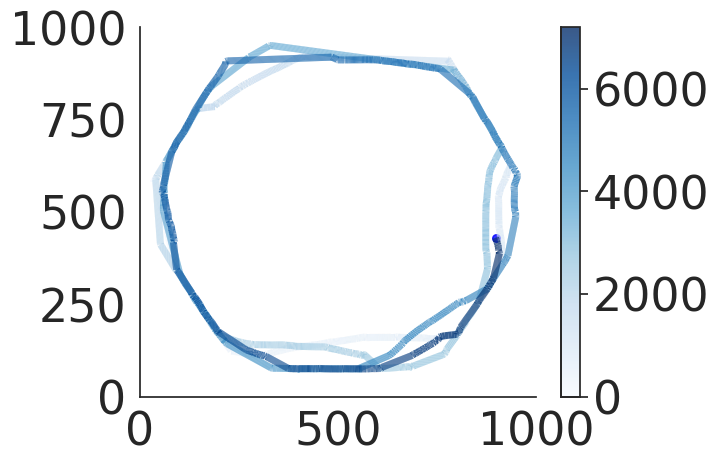

(1, 14781)


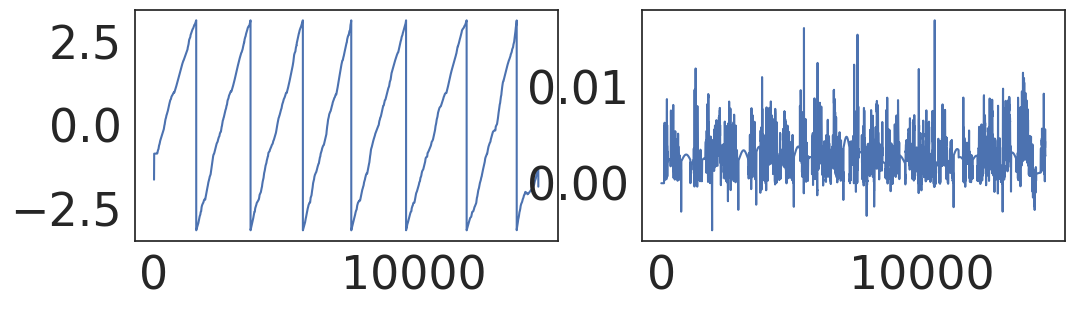

labels.SB_240417_f3.001_DZ_240417_f3_bio_horz_RL00.analysis
labels.SB_240417_f3.001_DZ_240417_f3_bio_horz_RL00.analysis :  bio_horz_RL ,  1  fish
frames x nodes x 2 x animals (14666, 5, 2, 1)


<Figure size 300x300 with 0 Axes>

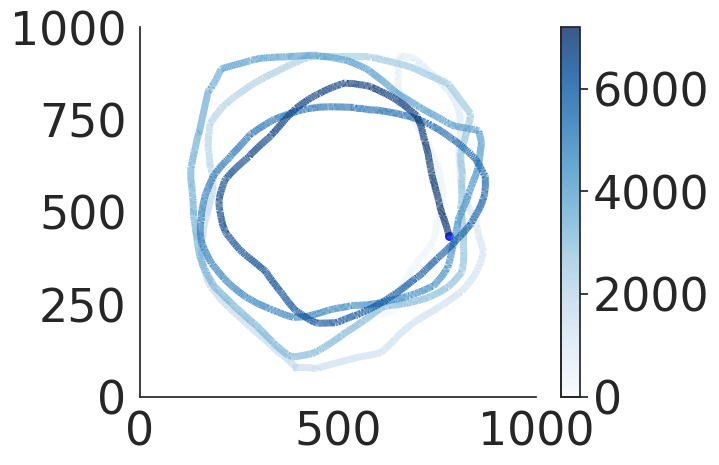

(1, 14666)


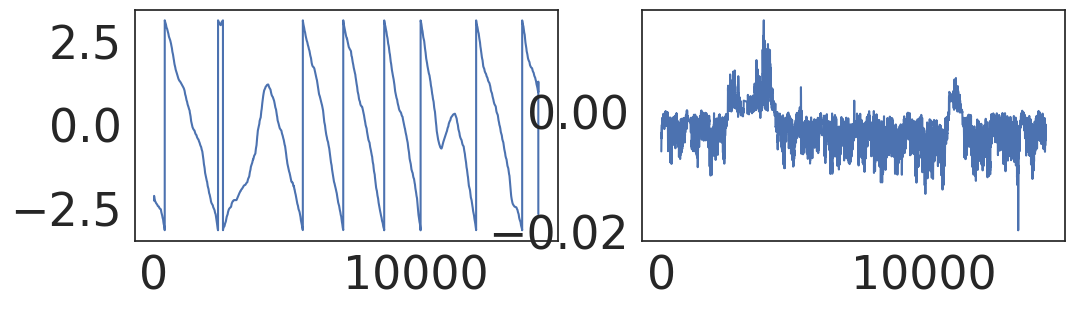

labels.SB_240417_f3.002_DZ_240417_f3_bio_vert_LR00.analysis
labels.SB_240417_f3.002_DZ_240417_f3_bio_vert_LR00.analysis :  bio_vert_LR ,  1  fish
frames x nodes x 2 x animals (9403, 5, 2, 1)


<Figure size 300x300 with 0 Axes>

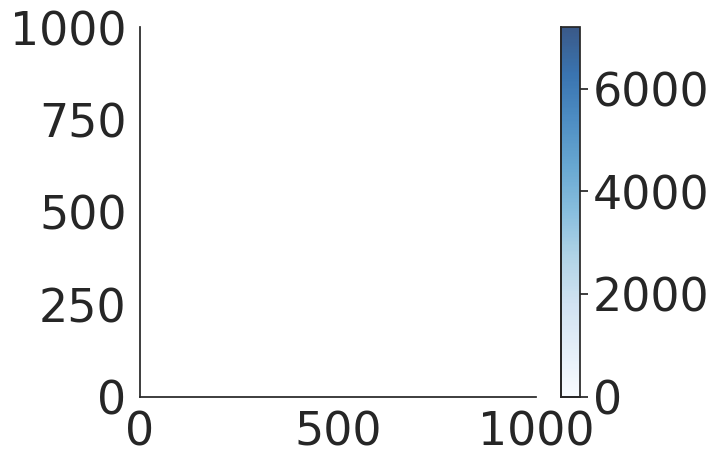

(1, 9403)


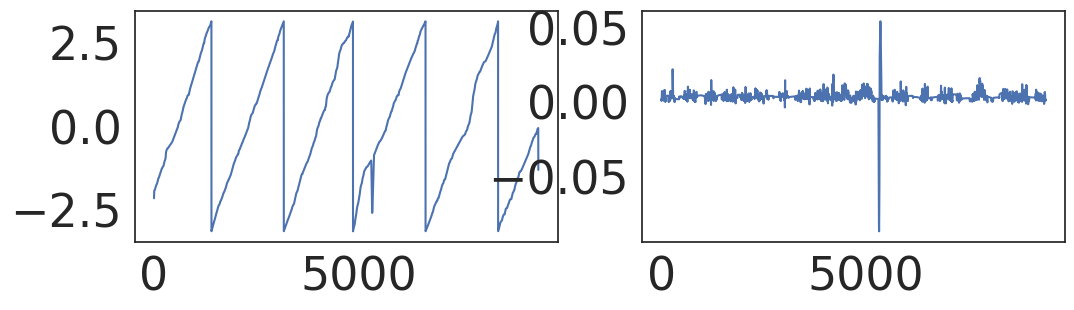

labels.SB_240417_f3.003_DZ_240417_f3_bio_vert_RL00.analysis
labels.SB_240417_f3.003_DZ_240417_f3_bio_vert_RL00.analysis :  bio_vert_RL ,  1  fish
frames x nodes x 2 x animals (9413, 5, 2, 1)


<Figure size 300x300 with 0 Axes>

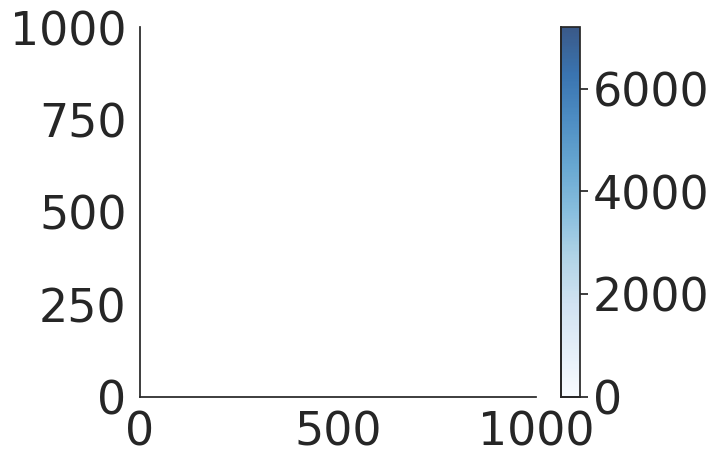

(1, 9413)


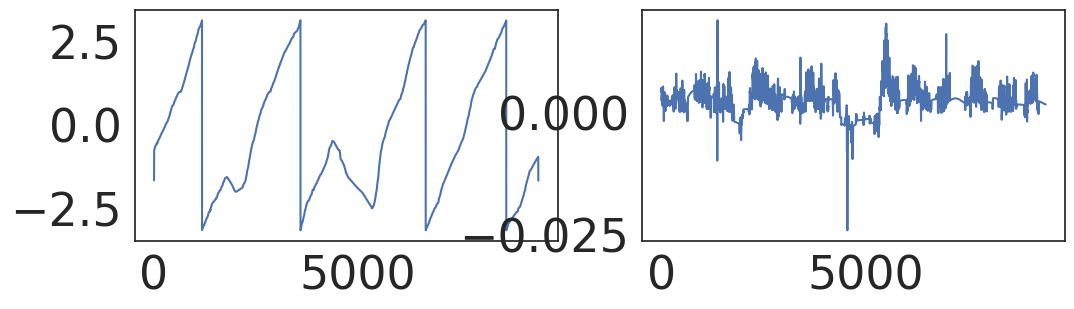

labels.SB_240417_f3.004_DZ_240417_f3_NoNbio_horz_LR00.analysis
labels.SB_240417_f3.004_DZ_240417_f3_NoNbio_horz_LR00.analysis :  NoNbio_horz_LR ,  1  fish
frames x nodes x 2 x animals (9414, 5, 2, 1)


<Figure size 300x300 with 0 Axes>

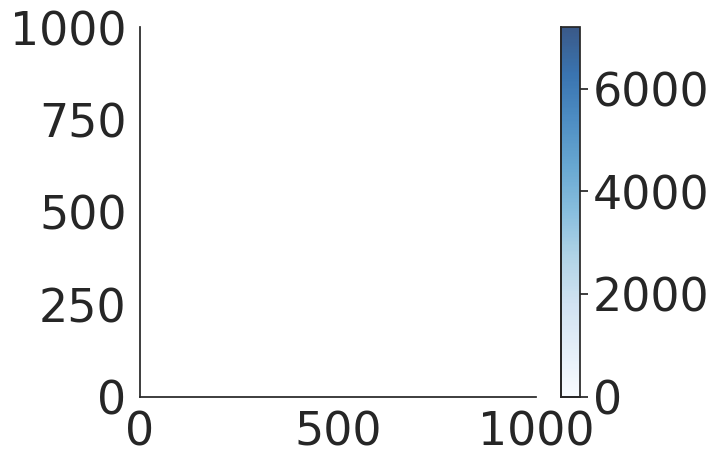

(1, 9414)


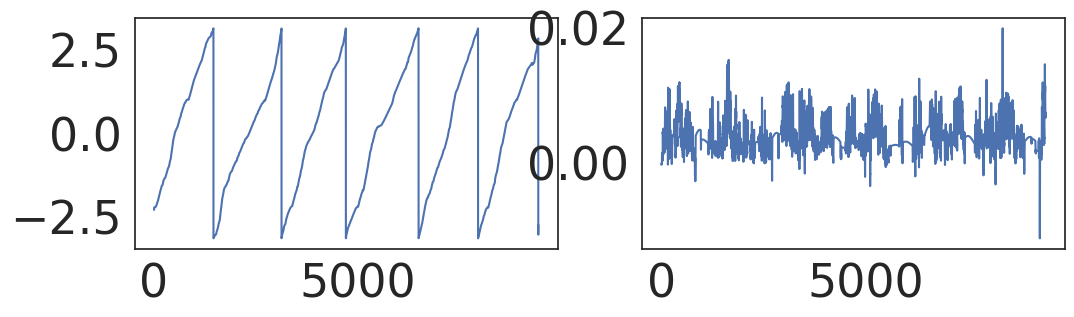

labels.SB_240417_f3.005_DZ_240417_f3_NoNbio_horz_RL00.analysis
labels.SB_240417_f3.005_DZ_240417_f3_NoNbio_horz_RL00.analysis :  NoNbio_horz_RL ,  1  fish
frames x nodes x 2 x animals (9417, 5, 2, 1)


<Figure size 300x300 with 0 Axes>

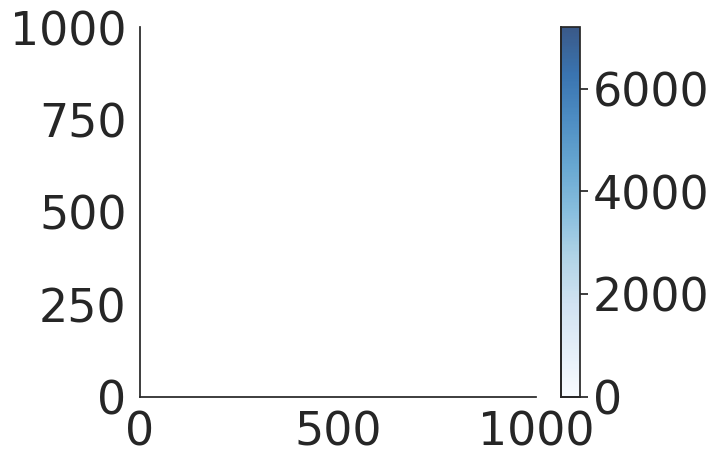

(1, 9417)


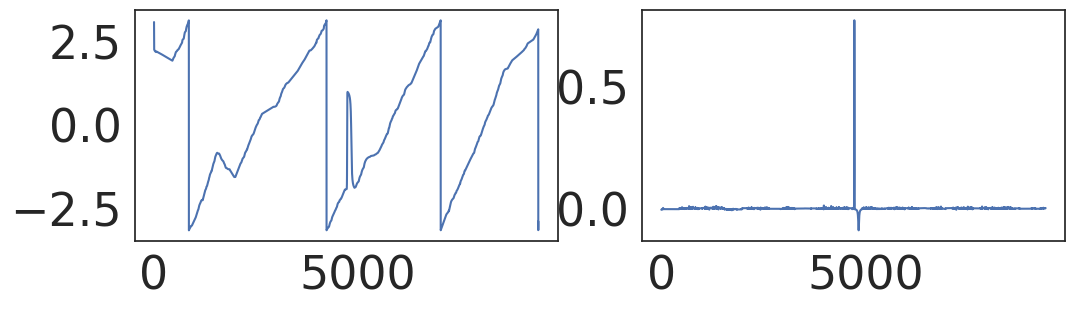

labels.SB_240417_f4.000_DZ_240417_f4_bio_horz_LR00.analysis
labels.SB_240417_f4.000_DZ_240417_f4_bio_horz_LR00.analysis :  bio_horz_LR ,  1  fish
frames x nodes x 2 x animals (14496, 5, 2, 1)


<Figure size 300x300 with 0 Axes>

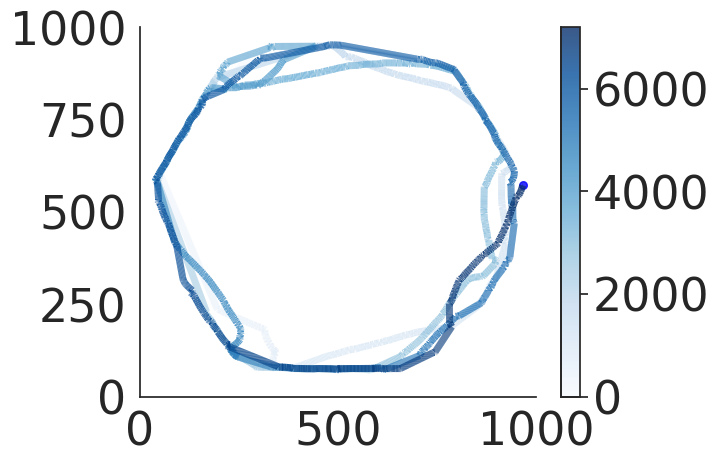

(1, 14496)


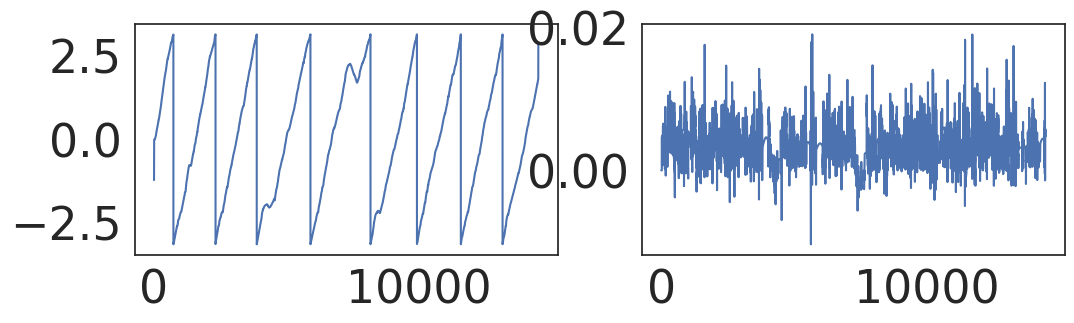

labels.SB_240417_f4.001_DZ_240417_f4_bio_horz_RL00.analysis
labels.SB_240417_f4.001_DZ_240417_f4_bio_horz_RL00.analysis :  bio_horz_RL ,  1  fish
frames x nodes x 2 x animals (15204, 5, 2, 1)


<Figure size 300x300 with 0 Axes>

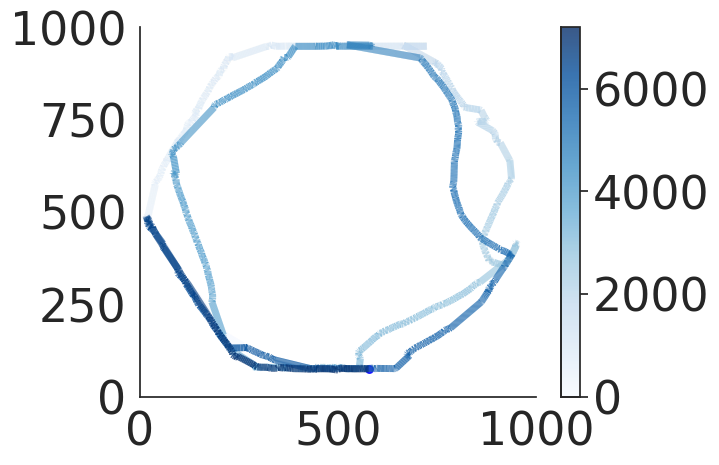

(1, 15204)


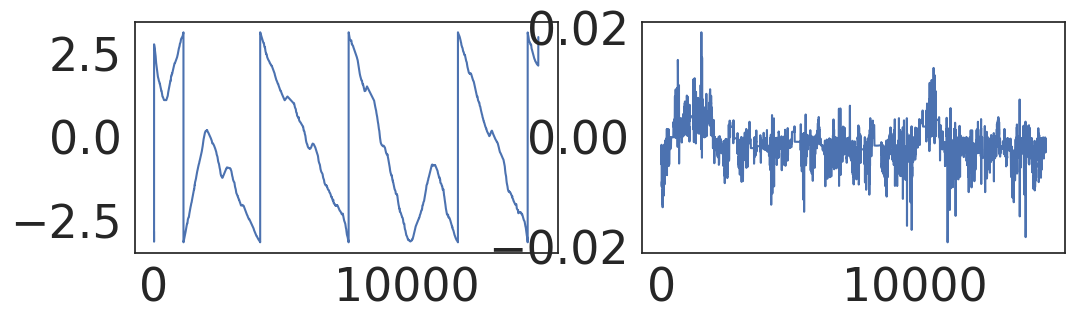

labels.SB_240417_f4.002_DZ_240417_f4_bio_vert_LR00.analysis
labels.SB_240417_f4.002_DZ_240417_f4_bio_vert_LR00.analysis :  bio_vert_LR ,  1  fish
frames x nodes x 2 x animals (14485, 5, 2, 1)


<Figure size 300x300 with 0 Axes>

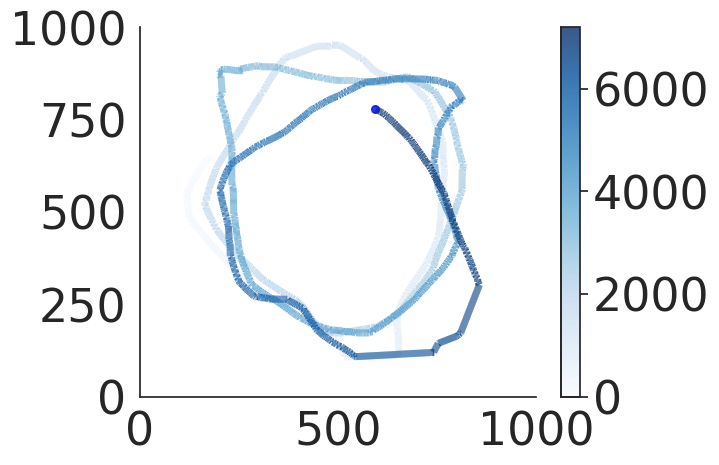

(1, 14485)


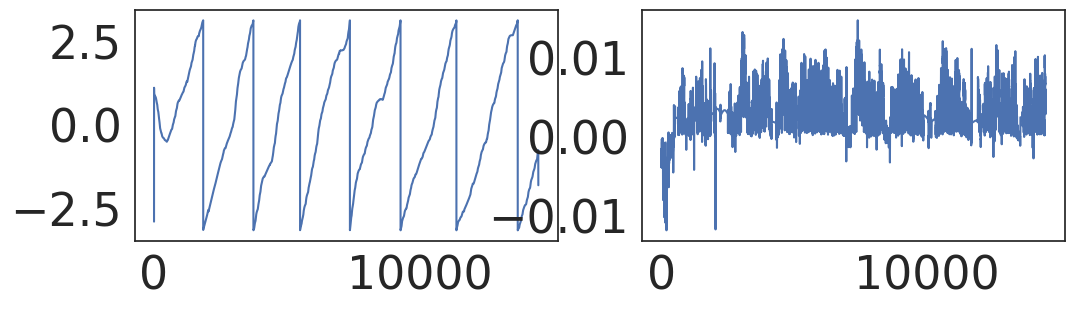

labels.SB_240417_f4.003_DZ_240417_f4_bio_vert_RL00.analysis
labels.SB_240417_f4.003_DZ_240417_f4_bio_vert_RL00.analysis :  bio_vert_RL ,  1  fish
frames x nodes x 2 x animals (15598, 5, 2, 1)


<Figure size 300x300 with 0 Axes>

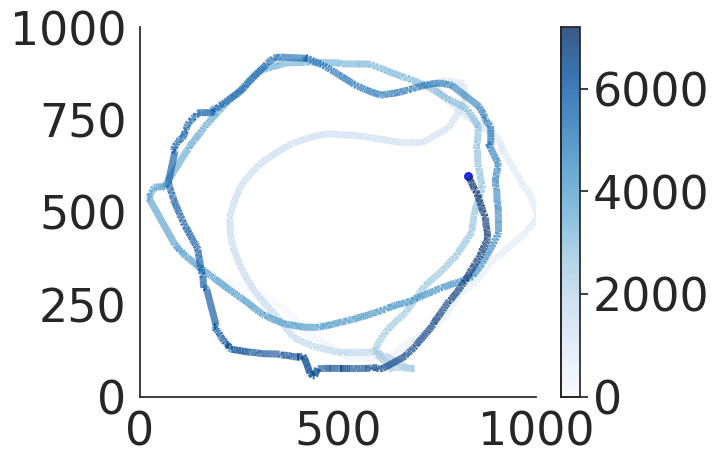

(1, 15598)


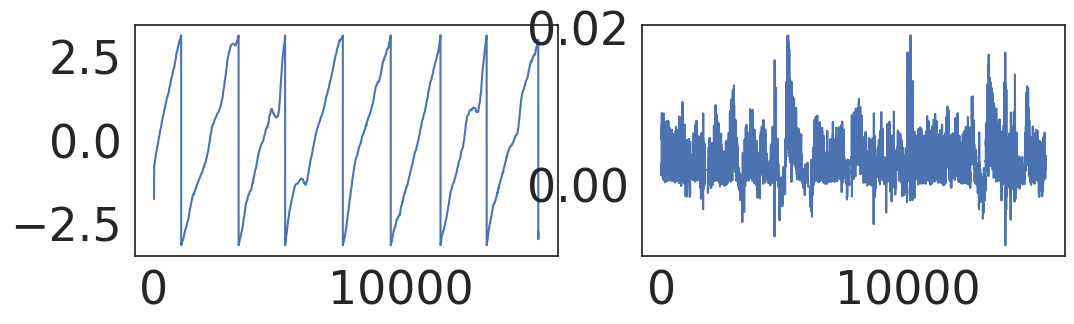

labels.SB_240417_f4.004_DZ_240417_f4_NoNbio_horz_LR00.analysis
labels.SB_240417_f4.004_DZ_240417_f4_NoNbio_horz_LR00.analysis :  NoNbio_horz_LR ,  1  fish
frames x nodes x 2 x animals (14728, 5, 2, 1)


<Figure size 300x300 with 0 Axes>

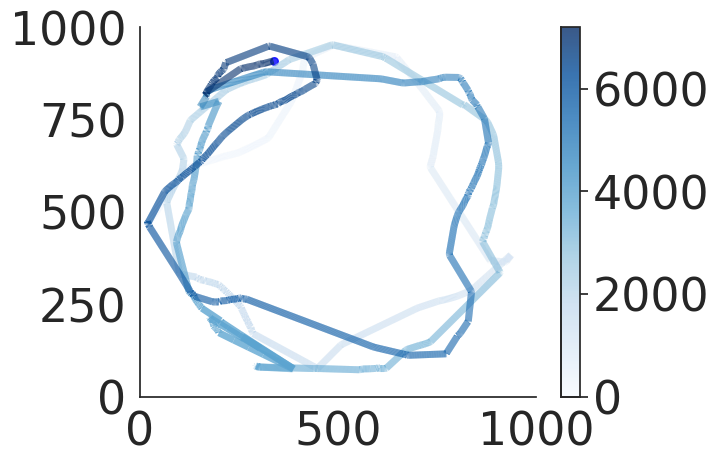

(1, 14728)


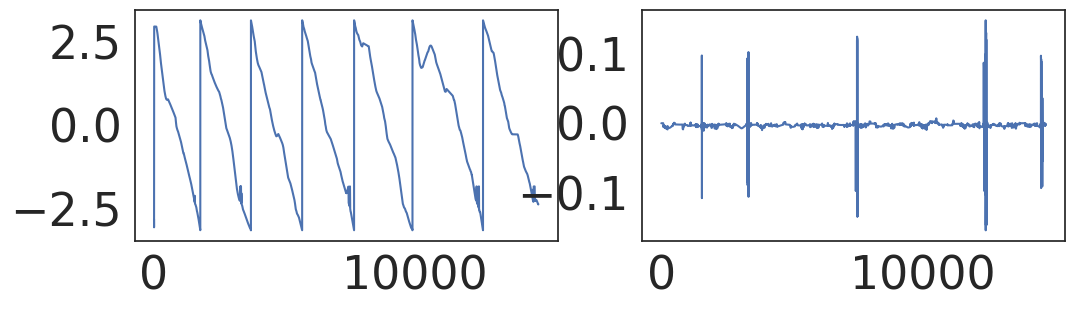

labels.SB_240417_f4.005_DZ_240417_f4_NoNbio_horz_RL00.analysis
labels.SB_240417_f4.005_DZ_240417_f4_NoNbio_horz_RL00.analysis :  NoNbio_horz_RL ,  1  fish
frames x nodes x 2 x animals (15042, 5, 2, 1)


<Figure size 300x300 with 0 Axes>

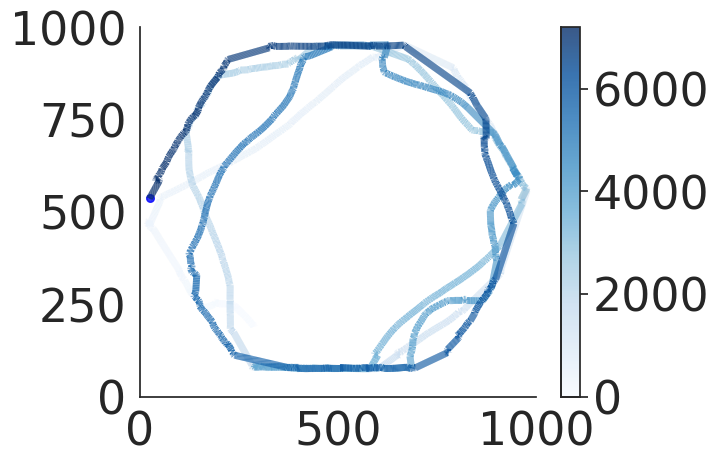

(1, 15042)


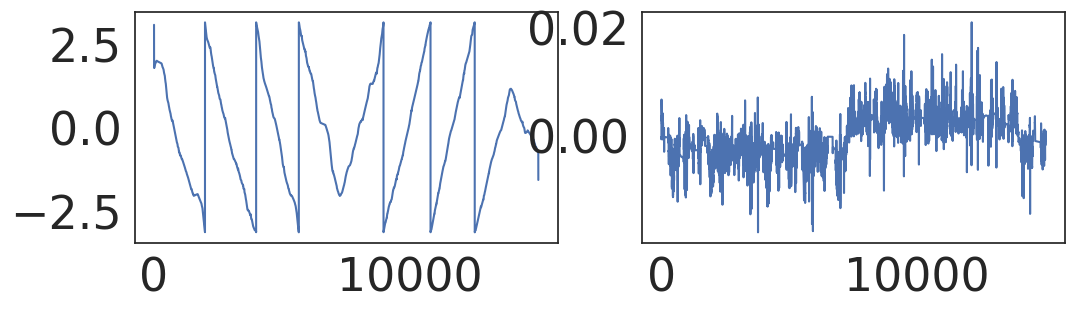

labels.vDavid_sixScreen_240417_f5.000_DZ_240417_f5_bio_horz_LR0.analysis
labels.vDavid_sixScreen_240417_f5.000_DZ_240417_f5_bio_horz_LR0.analysis :  bio_horz_LR ,  1  fish
frames x nodes x 2 x animals (18031, 6, 2, 1)


<Figure size 300x300 with 0 Axes>

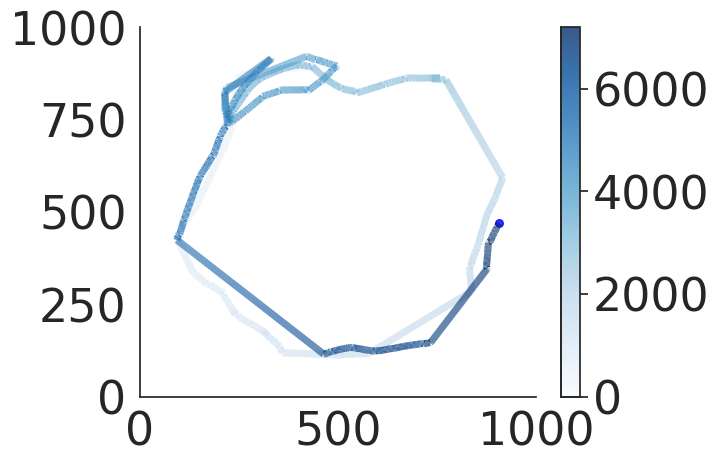

(1, 18031)


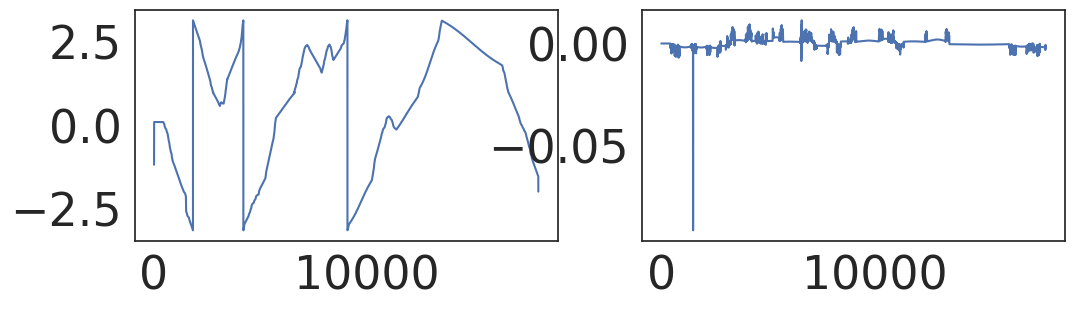

labels.vDavid_sixScreen_240417_f5.001_DZ_240417_f5_bio_horz_RL0.analysis
labels.vDavid_sixScreen_240417_f5.001_DZ_240417_f5_bio_horz_RL0.analysis :  bio_horz_RL ,  1  fish
frames x nodes x 2 x animals (18023, 6, 2, 1)


<Figure size 300x300 with 0 Axes>

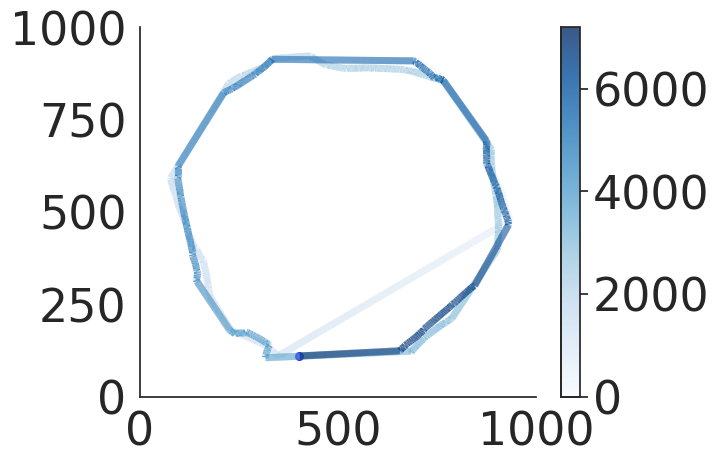

(1, 18023)


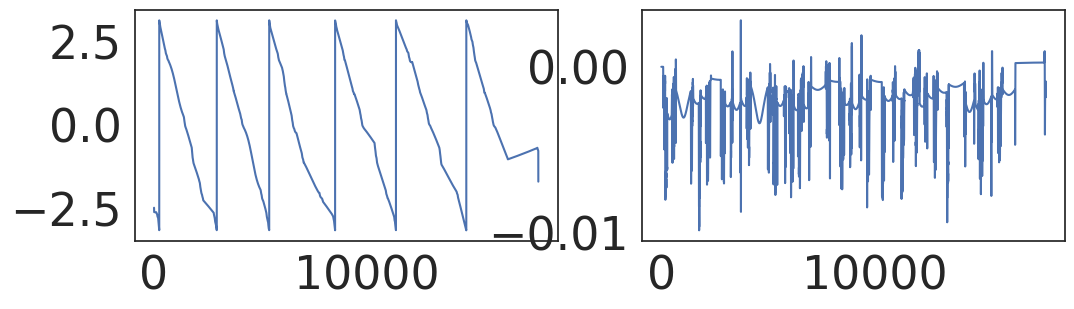

labels.vDavid_sixScreen_240417_f5.002_DZ_240417_f5_bio_vert_LR0.analysis
labels.vDavid_sixScreen_240417_f5.002_DZ_240417_f5_bio_vert_LR0.analysis :  bio_vert_LR ,  1  fish
frames x nodes x 2 x animals (18021, 6, 2, 1)


<Figure size 300x300 with 0 Axes>

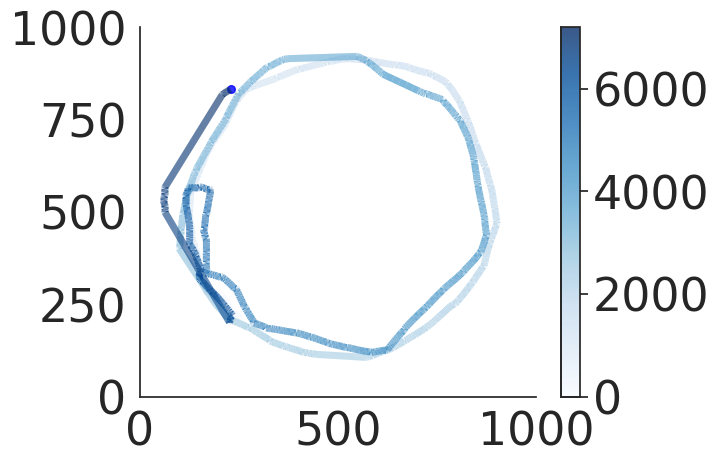

(1, 18021)


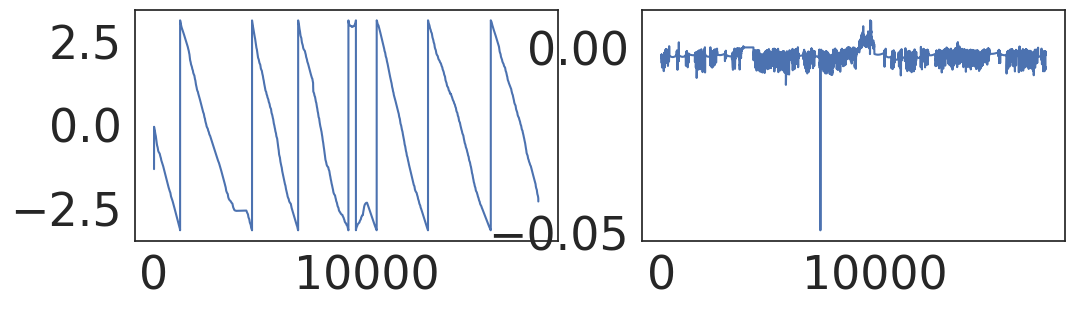

labels.vDavid_sixScreen_240417_f5.003_DZ_240417_f5_bio_vert_RL0.analysis
labels.vDavid_sixScreen_240417_f5.003_DZ_240417_f5_bio_vert_RL0.analysis :  bio_vert_RL ,  1  fish
frames x nodes x 2 x animals (17849, 6, 2, 1)


<Figure size 300x300 with 0 Axes>

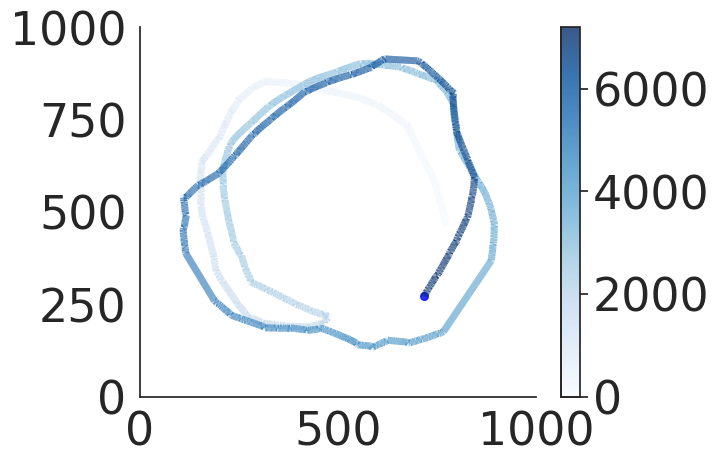

(1, 17849)


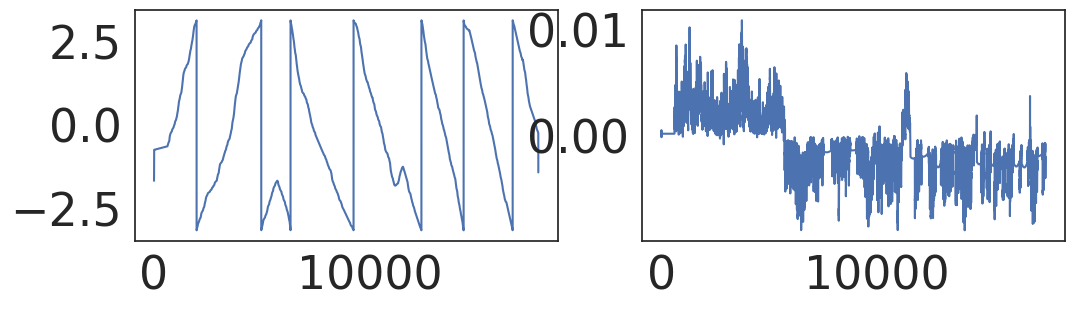

labels.vDavid_sixScreen_240417_f5.004_DZ_240417_f5_NoNbio_horz_LR0.analysis
labels.vDavid_sixScreen_240417_f5.004_DZ_240417_f5_NoNbio_horz_LR0.analysis :  NoNbio_horz_LR ,  1  fish
frames x nodes x 2 x animals (17753, 6, 2, 1)


<Figure size 300x300 with 0 Axes>

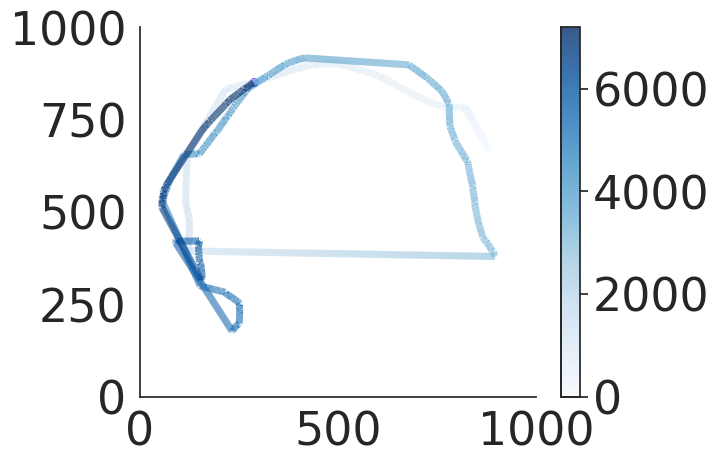

(1, 17753)


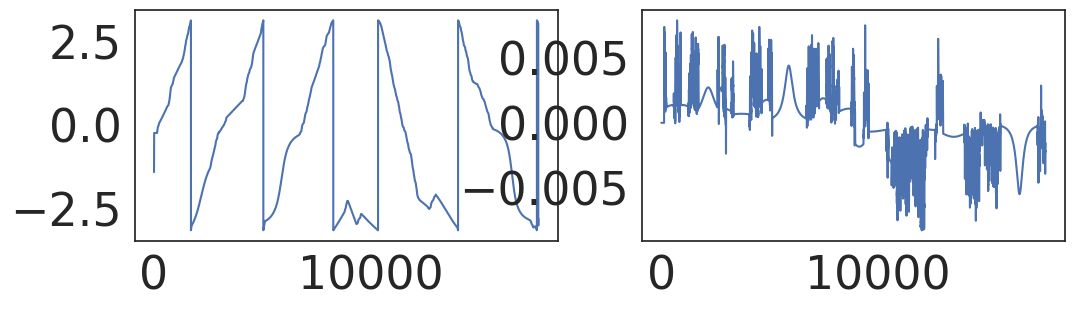

labels.vDavid_sixScreen_240417_f5.005_DZ_240417_f5_NoNbio_horz_RL0.analysis
labels.vDavid_sixScreen_240417_f5.005_DZ_240417_f5_NoNbio_horz_RL0.analysis :  NoNbio_horz_RL ,  1  fish
frames x nodes x 2 x animals (17795, 6, 2, 1)


<Figure size 300x300 with 0 Axes>

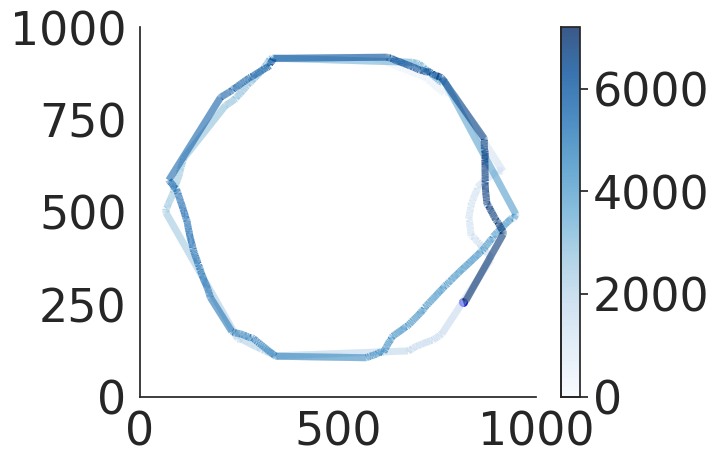

(1, 17795)


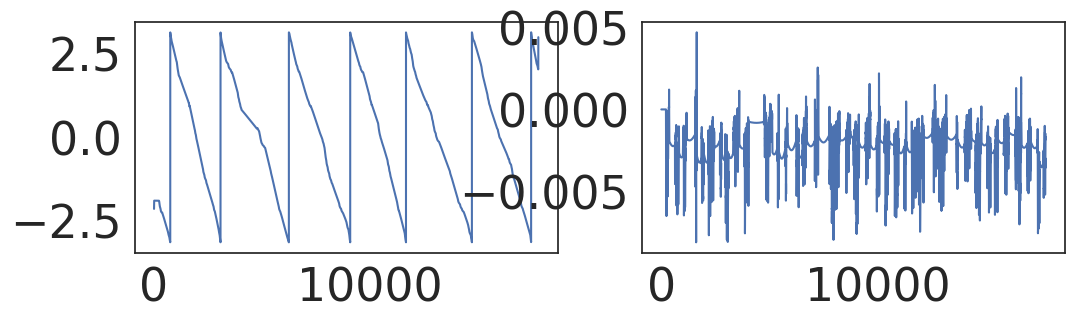

In [ ]:
# loop through all experiment in the log

bio_horz_LR =[]
bio_horz_RL =[]
bio_vert_LR =[]
bio_vert_RL =[]
nonbio_horz_LR =[]
nonbio_horz_RL =[]
summary_data=[bio_horz_LR,bio_horz_RL,bio_vert_LR,bio_vert_RL,nonbio_horz_LR,nonbio_horz_RL]
group = ['bio_horz_LR','bio_horz_RL','bio_vert_LR','bio_vert_RL' ,'NoNbio_horz_LR','NoNbio_horz_RL']

for exp in experiments:
  if os.path.isfile(behav_path + exp +'.h5') == True:
    print(str(exp))

    # load metadata
    exp_type = metadata.loc[exp,'exp_type']
    fish_num = metadata.loc[exp,'fish_num']
    fps_Hz = metadata.loc[exp,'fps_Hz']
    rig_mm = metadata.loc[exp,'rig_mm']
    vid_px = metadata.loc[exp,'vid_px']
    scale = rig_mm / vid_px # mm/pixel
    print(exp, ': ', exp_type, ', ', fish_num, ' fish')

    # make analysis folder
    os.makedirs(save_path + experiment_class, exist_ok=True)

    # load the h5
    h5_obj = h5py.File(behav_path + exp +'.h5', "r")

    h5tracks = h5_obj['tracks'][:].T
    frame_num, _, _, track_num = h5tracks.shape
    print("frames x nodes x 2 x animals", h5tracks.shape)

    # load data from h5 tracks
    group_data = process_h5(h5tracks,fish_num,sleap_nodes, exp)

    # organize them into group arrays and save as lev0_basics.npz
    f_bodylength_px, f_bodylength_mm, f_nosex, f_nosey, f_x, f_y, f_tailx, f_taily, f_heading, f_tail_angle, f_speed, f_ang_speed = group_arrays(group_data,fish_num,frame_num,fps_Hz,scale)

    savinglist = {'exp_type':exp_type,'fish_num':fish_num,'scale':scale,'fps':fps_Hz,\
                'f_bodylength_mm':f_bodylength_mm,'f_bodylength_px':f_bodylength_px,'f_nosex':f_nosex,'f_nosey':f_nosey,\
                'f_x':f_x,'f_y':f_y,'f_tailx':f_tailx,'f_taily':f_taily,\
                'f_heading':f_heading,'f_tail_angle':f_tail_angle,'f_speed':f_speed,'f_ang_speed':f_ang_speed}
    save_npz(save_path,exp,'lev0_basics',savinglist)

    plot_length = 60*120
    frame_start = 30*120

    plt.figure(figsize=[3,3])
    fig, ax = plt.subplots()

    for f in range(fish_num):
      if len(f_x[f]) > plot_length+frame_start:

        x = f_x[f][frame_start:frame_start+plot_length]
        y = f_y[f][frame_start:frame_start+plot_length]
        time = np.array(range(plot_length))

        norm = mcolors.Normalize(time.min(), time.max())
        cmap = plt.get_cmap('Blues')

        points = np.array([x, y]).T.reshape(-1, 1, 2)
        segments = np.concatenate([points[:-1], points[1:]], axis=1)
        lc = mcoll.LineCollection(segments, array=time, cmap=cmap, norm=norm, linewidth=5, alpha=0.8)
        line = ax.add_collection(lc)
        plt.scatter(f_x[f][frame_start+plot_length],f_y[f][frame_start+plot_length],color='blue', alpha=0.8, s=30)

    cmap='Greys'

    fig.colorbar(line, ax=ax, cmap='Greys')
    ax.set_xlim(0,1000)
    ax.set_ylim(0,1000)
    sns.despine()

    #plt.title('swimming trajectories, 2 m')
    plt.savefig(figure_savepath +str(exp)+"_trajectory.pdf", transparent=True, bbox_inches='tight', pad_inches=0.2)
    plt.show()


    for a,s in zip(group,summary_data):
      if exp_type==a:
        f_x = np.array(f_x)
        f_y = np.array(f_y)

        print(np.shape(f_x))

        # Compute center and angles
        center_x = 500
        center_y = 500
        angles = np.arctan2(f_y - center_y, f_x - center_x)
        delta_angles = np.diff(angles)
        delta_angles = np.where(delta_angles > np.pi, delta_angles - 2*np.pi, delta_angles)
        delta_angles = np.where(delta_angles < -np.pi, delta_angles + 2*np.pi, delta_angles)

        # Count rotations / total frames:
        clockwise_count = np.sum(delta_angles > 0) / np.shape(f_x)[1]
        counterclockwise_count = np.sum(delta_angles < 0) / np.shape(f_x)[1]

        plt.figure(figsize=[12,3])
        plt.subplot(121)
        plt.plot(angles[0])
        plt.subplot(122)
        plt.plot(delta_angles[0][10:-10])
        plt.show()

        # Append to summary data and multiple by seconds of the total recording time (2.5min / 150sec):
        if exp_type == 'bio_horz_LR':
          s.append(clockwise_count)
        if exp_type == 'bio_horz_RL':
          s.append(counterclockwise_count)
        if exp_type == 'bio_vert_LR':
          s.append(clockwise_count)
        if exp_type == 'bio_vert_RL':
          s.append(counterclockwise_count)
        if exp_type == 'NoNbio_horz_LR':
          s.append(clockwise_count)
        if exp_type == 'NoNbio_horz_RL':
          s.append(counterclockwise_count)






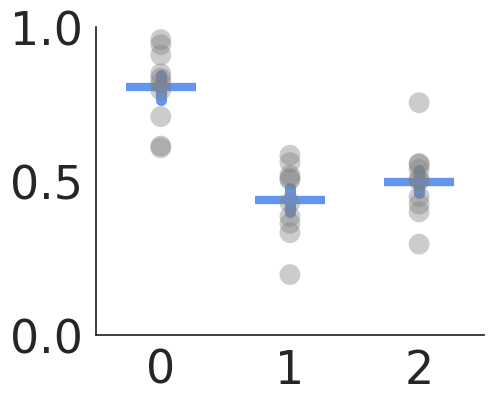

statistics for comparison: one-way ANOVA  with posthoc Dunns comparison (bonferroni corrected)
F-statistic:  25.722019374473902 P-value:  5.582793334844527e-07
          1         2         3
1  1.000000  0.000003  0.000029
2  0.000003  1.000000  0.282325
3  0.000029  0.282325  1.000000
group #, N, MEANS, and SEM
0 10 0.803099744255443 0.03960908954201859
normality test is ShapiroResult(statistic=0.9166948795318604, pvalue=0.3302118182182312)
1 10 0.4374102030799144 0.03803245849220646
normality test is ShapiroResult(statistic=0.9349280595779419, pvalue=0.4980719983577728)
2 10 0.49728156456737815 0.03836434218356953
normality test is ShapiroResult(statistic=0.9449906349182129, pvalue=0.609754204750061)


In [ ]:
import seaborn as sns
import statsmodels.api as sm
from statsmodels.stats.anova import AnovaRM
from statsmodels.stats.multicomp import MultiComparison
import scipy
from scipy import stats


Bio_horz = [np.mean([x,y]) for x, y in zip(bio_horz_LR , bio_horz_RL )]
Bio_vert = [np.mean([x,y]) for x, y in zip(bio_vert_LR , bio_vert_RL )]
NonBio_horz = [np.mean([x,y]) for x, y in zip(nonbio_horz_LR , nonbio_horz_RL )]

# Plotting
plt.figure(figsize=[5,4])
sns.pointplot(data=[Bio_horz, Bio_vert, NonBio_horz], estimator='mean', errorbar='se', markers='_', markersize=50, linewidth=8, palette=['cornflowerblue','cornflowerblue','cornflowerblue'], linestyle='none')
sns.stripplot(data=[Bio_horz, Bio_vert, NonBio_horz], s=15, palette=['grey', 'grey', 'grey'], jitter=False, alpha=0.4)
plt.ylim(0, 1)

sns.despine()
plt.savefig(figure_savepath +"_following_fraction.pdf", transparent=True, bbox_inches='tight', pad_inches=0.2)

plt.show()


summary_data=[Bio_horz, Bio_vert, NonBio_horz]

print('statistics for comparison: one-way ANOVA  with posthoc Dunns comparison (bonferroni corrected)')
data = pd.DataFrame({
            'value': np.concatenate(summary_data),
            'group': np.repeat(['a','b','c'],
                              repeats=[len(summary_data[0]), len(summary_data[1]), len(summary_data[2])])
        })
# one-way ANOVA
f_statistic, p_value = stats.f_oneway(summary_data[0], summary_data[1], summary_data[2])
print("F-statistic: ", f_statistic, "P-value: ", p_value)

# If p-value < 0.05, we can perform post hoc test (ttest)
if p_value < 0.05:
  posthoc = sp.posthoc_ttest(summary_data, val_col='value', group_col='group')
  print(posthoc)

print("group #, N, MEANS, and SEM")
for ndx,i in enumerate(summary_data):
  print(ndx, len(i), np.mean(i), scipy.stats.sem(i))
  print('normality test is', scipy.stats.shapiro(i))

Maybe we can try to calculate the bias of each fish (the prominent swim direction in both LR / RL) and then to calculate in which stim the fish was less biased to that direction. I think (DZ) it will be more significant.

In [ ]:
print(rig_mm)

300
